In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
import warnings
warnings.filterwarnings("ignore")

In [2]:
rectifier = pd.read_csv("data/parser/rectifier.csv")
print(rectifier.shape)
rectifier.head()

(20, 17)


整流器     項目                 檢測日期  排流點電位_mv  自動回授電位_mv  接地棒阻抗_Ω  鈦陽極接地電阻A1_Ω   
0   24  109Q3  2020-07-21 00:00:00     -1447      -1348     6.32         4.56  \
1   24  109Q4  2020-12-01 00:00:00     -1371      -1298     6.86         5.72   
2   24  110Q1  2021-01-22 00:00:00     -1492      -1318     3.20         2.28   
3   24  110Q2  2021-04-29 00:00:00     -1217      -1182     6.82         5.43   
4   24  110Q3  2021-07-20 00:00:00     -1457      -1198     1.10         1.79   

   鈦陽極接地電阻A2_Ω  鈦陽極接地電阻A3_Ω  鈦陽極接地電阻A4_Ω  鈦陽極總接地電阻_Ω  本次電力_KWH  平均電力值_KWH/日   
0         4.52         4.65         5.91        4.28      3541     6.750000  \
1         5.73         5.85         6.81        5.48      4303     5.730000   
2         2.33         2.35         3.64        2.22      4655     6.770000   
3         5.65         6.73         7.44        5.36      5288     6.530000   
4         2.61         2.84         3.19        2.19      5750     5.634146   

   交流輸入_A  交流輸入_V  直流輸出_A  直流輸出_V  
0    0.65   230.9    1.55    3.80  
1    1.74   231.6    1.81    1.87  
2    0.68   231.0    1.56    3.77  
3    0.84   235.0    2.10    3.76  
4    0.74   230.2    1.75    3.77

In [3]:
corrosion = pd.read_csv("data/parser/corrosion.csv")
print(corrosion.shape)
corrosion.head()

(40, 8)


季節   檢測器  G95汽油管線  DS柴油管線  JF航空燃油管線  G92汽油管線  最低電位標準值  最高電位標準值
0   1  T168    -1319   -1318     -1312    -1311    -1500     -850
1   1  T167    -1408   -1405     -1400    -1402    -1500     -850
2   1  T166    -1447   -1441     -1419    -1442    -1500     -850
3   1  T165    -1451   -1469     -1427    -1460    -1500     -850
4   1  T164    -1411   -1398     -1442    -1440    -1500     -850

In [4]:
df_all = pd.read_csv("data/parser/rectifier_corrosion.csv")
print(df_all.shape)
df_all.head()

(80, 25)


整流器     項目                 檢測日期  排流點電位_mv  自動回授電位_mv  接地棒阻抗_Ω  鈦陽極接地電阻A1_Ω   
0   24  111Q1  2022-03-17 00:00:00     -1473      -1287     2.56         2.27  \
1   24  111Q1  2022-03-17 00:00:00     -1473      -1287     2.56         2.27   
2   24  111Q1  2022-03-17 00:00:00     -1473      -1287     2.56         2.27   
3   24  111Q1  2022-03-17 00:00:00     -1473      -1287     2.56         2.27   
4   24  111Q1  2022-03-17 00:00:00     -1473      -1287     2.56         2.27   

   鈦陽極接地電阻A2_Ω  鈦陽極接地電阻A3_Ω  鈦陽極接地電阻A4_Ω  ...  直流輸出_A  直流輸出_V  季節  檢測器   
0         2.23         2.26         3.45  ...    1.48   3.731   1  168  \
1         2.23         2.26         3.45  ...    1.48   3.731   1  167   
2         2.23         2.26         3.45  ...    1.48   3.731   1  166   
3         2.23         2.26         3.45  ...    1.48   3.731   1  165   
4         2.23         2.26         3.45  ...    1.48   3.731   1  164   

   G95汽油管線  DS柴油管線  JF航空燃油管線  G92汽油管線  最低電位標準值  最高電位標準值  
0    -1319   -1318     -1312    -1311    -1500     -850  
1    -1408   -1405     -1400    -1402    -1500     -850  
2    -1447   -1441     -1419    -1442    -1500     -850  
3    -1451   -1469     -1427    -1460    -1500     -850  
4    -1411   -1398     -1442    -1440    -1500     -850  

[5 rows x 25 columns]

## Heatmap

### rectifier

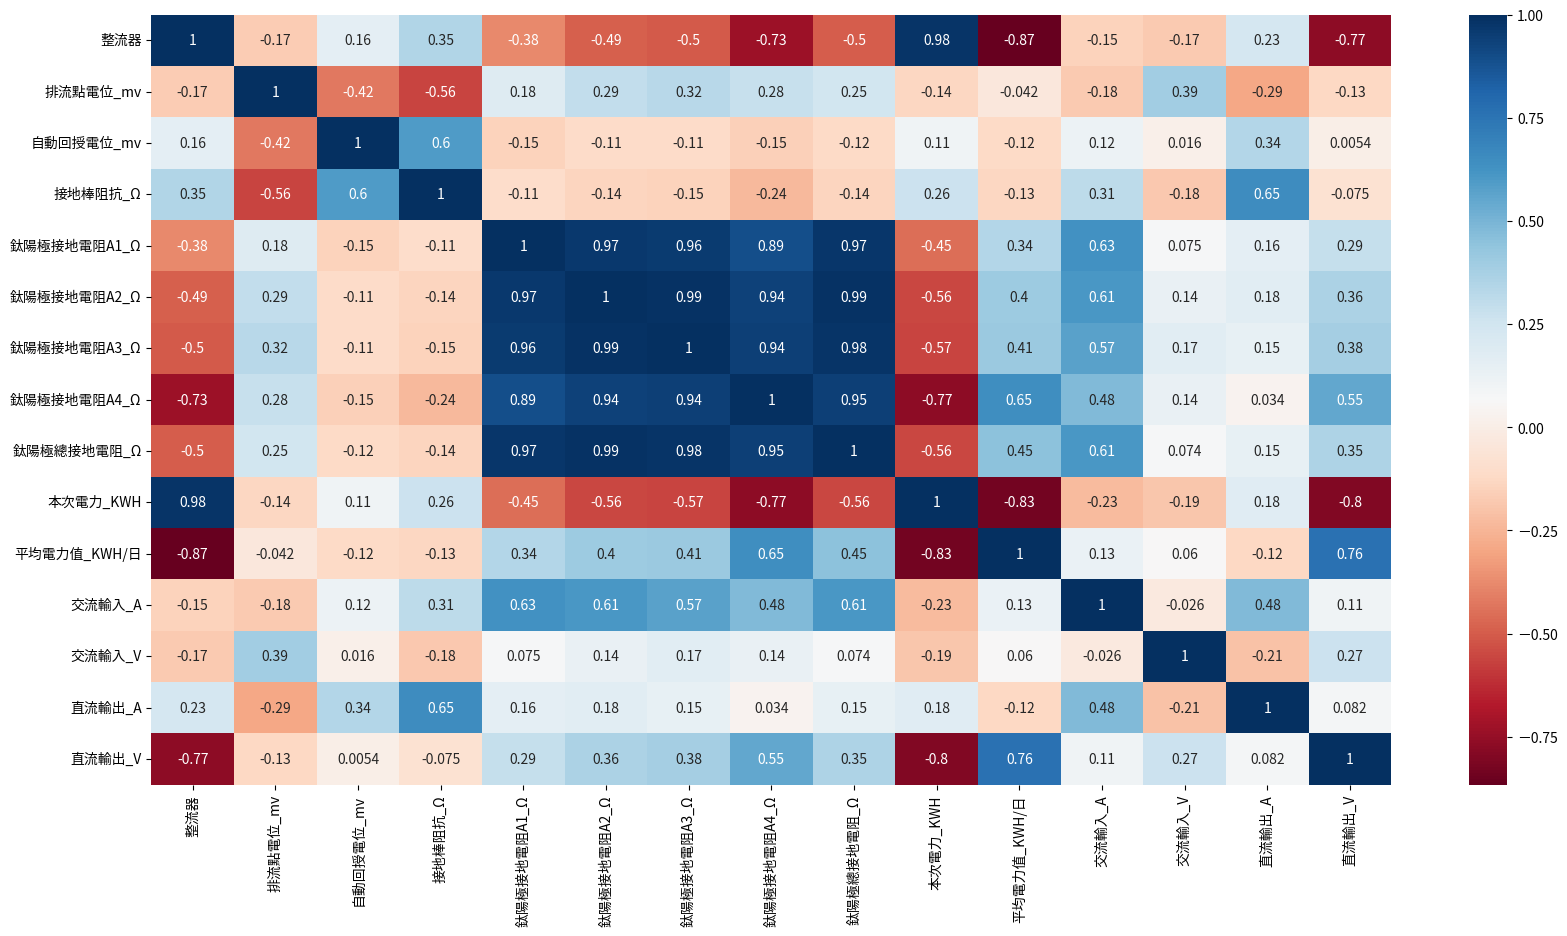

In [5]:
plt.figure(figsize=(20, 10))
corr = rectifier.select_dtypes("number").corr().round(4)
sns.heatmap(data = corr, annot=True, cmap = 'RdBu')
plt.show()

### corrosion

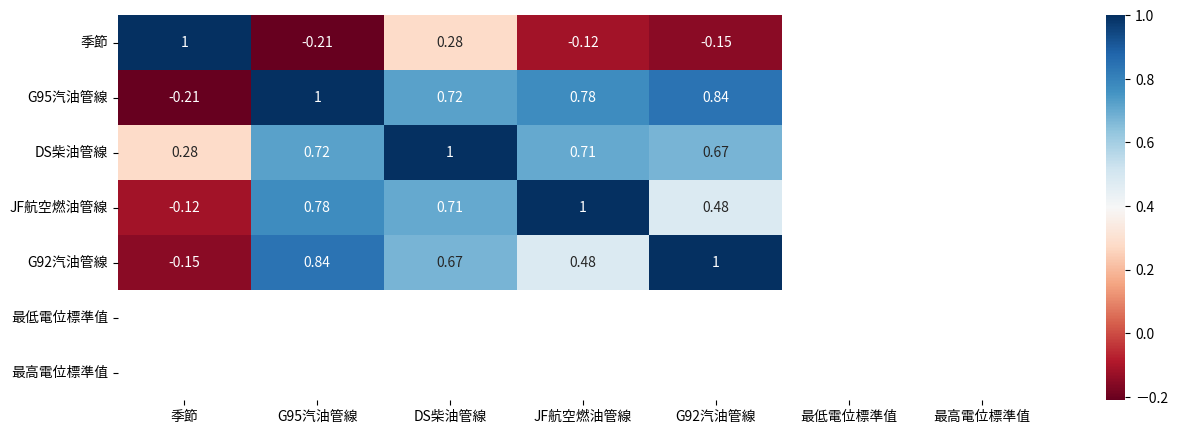

In [6]:
plt.figure(figsize=(15, 5))
corr = corrosion.select_dtypes("number").corr().round(4)
sns.heatmap(data = corr, annot=True, cmap = 'RdBu')
plt.show()

### all

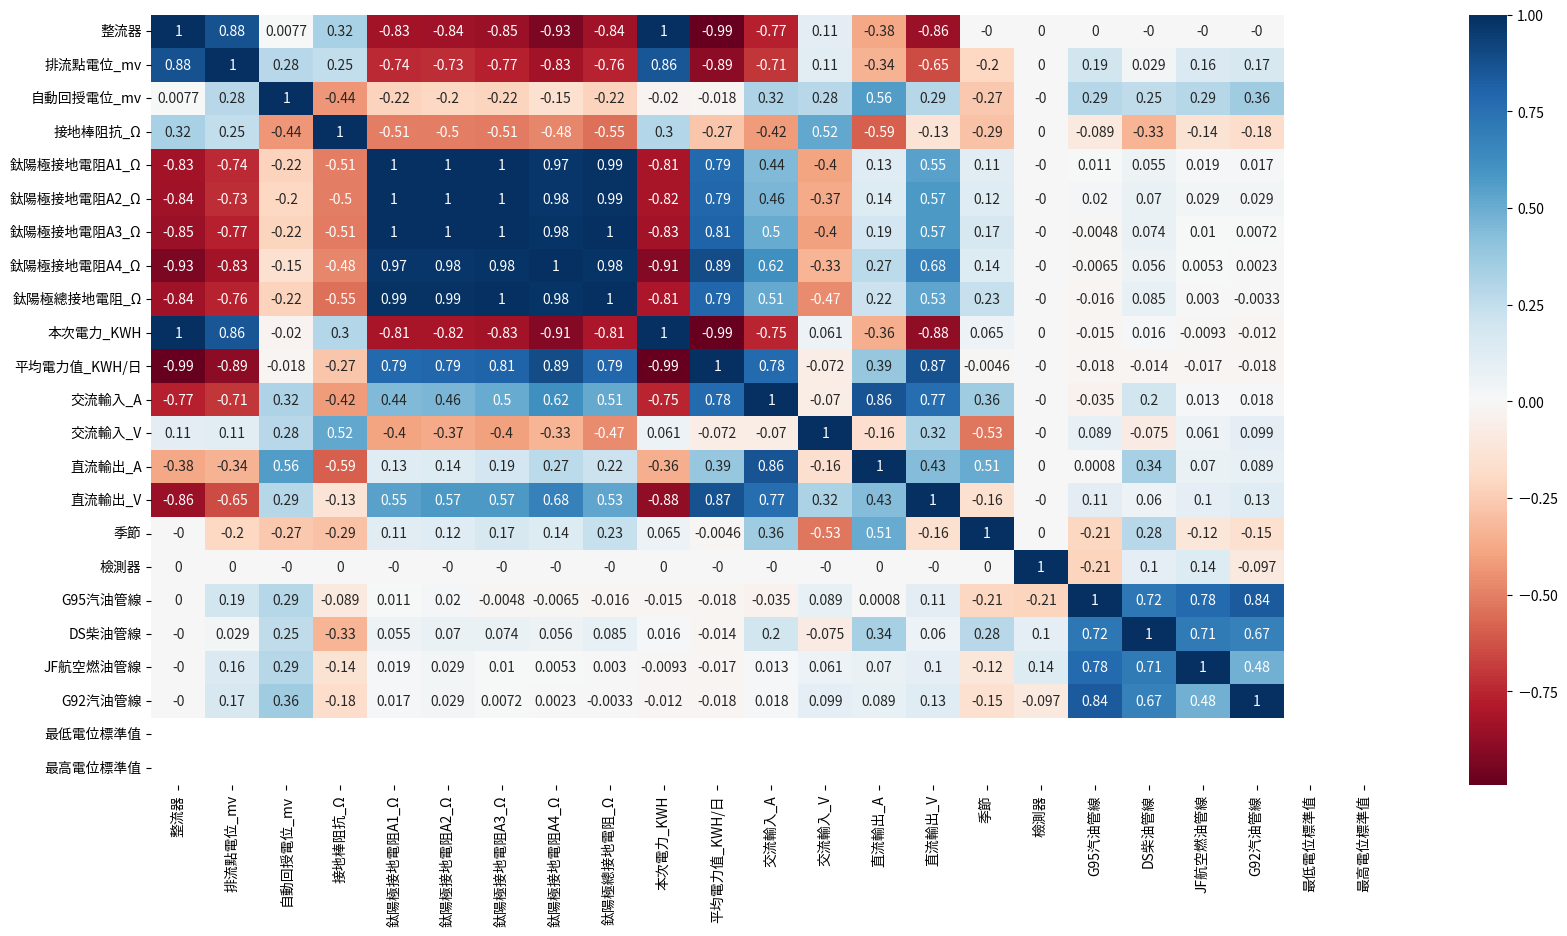

In [7]:
plt.figure(figsize=(20, 10))
corr = df_all.select_dtypes("number").corr().round(4)
sns.heatmap(data = corr, annot=True, cmap = 'RdBu')
plt.show()

## Univariate Analysis 

In [8]:
rectifier["季節"] = rectifier["項目"].str[-1]
rectifier["季節"] = rectifier["季節"].astype(int)

corrosion["檢測器1"] = corrosion["檢測器"].str[1:]
corrosion["檢測器1"] = corrosion["檢測器1"].astype(int)

# rectifier
num_feat_rectifier = [
    '排流點電位_mv', '自動回授電位_mv', '接地棒阻抗_Ω', '鈦陽極接地電阻A1_Ω', '鈦陽極接地電阻A2_Ω', '鈦陽極接地電阻A3_Ω', '鈦陽極接地電阻A4_Ω', '鈦陽極總接地電阻_Ω', 
    '本次電力_KWH', '平均電力值_KWH/日', '交流輸入_A', '交流輸入_V', '直流輸出_A', '直流輸出_V'
    ]
cat_feat_rectifier = ["整流器", "季節"]

# corrosion
num_feat_corrosion = ['G95汽油管線', 'DS柴油管線', 'JF航空燃油管線', 'G92汽油管線']
cat_feat_corrosion = ["季節", '檢測器1']

# all
num_feat_all = [
    '排流點電位_mv', '自動回授電位_mv', '接地棒阻抗_Ω', '鈦陽極接地電阻A1_Ω', '鈦陽極接地電阻A2_Ω', '鈦陽極接地電阻A3_Ω', '鈦陽極接地電阻A4_Ω', '鈦陽極總接地電阻_Ω', 
    '本次電力_KWH', '平均電力值_KWH/日', '交流輸入_A', '交流輸入_V', '直流輸出_A', '直流輸出_V', 'G95汽油管線', 'DS柴油管線', 'JF航空燃油管線', 'G92汽油管線'
    ]
cat_feat_all = ["整流器", '檢測器', "季節"]

### rectifier

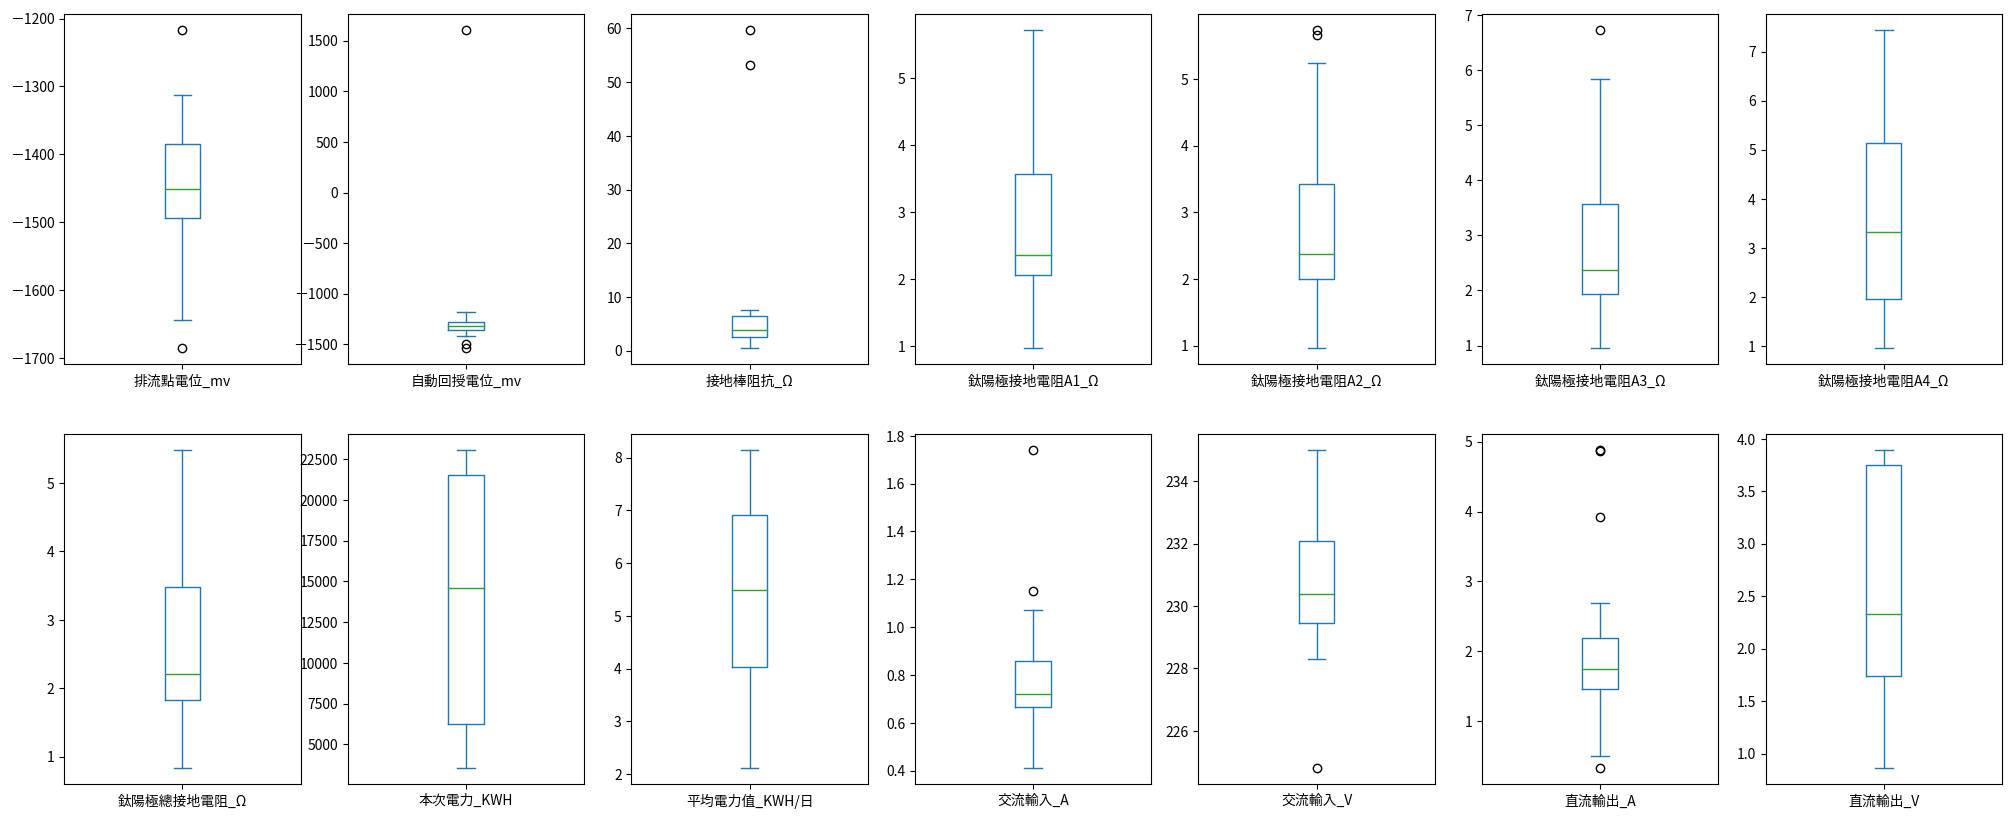

In [9]:
a = 2 ; b = 7 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        rectifier[num_feat_rectifier[k]].plot(kind = "box", ax = ax[i, j])
        k += 1

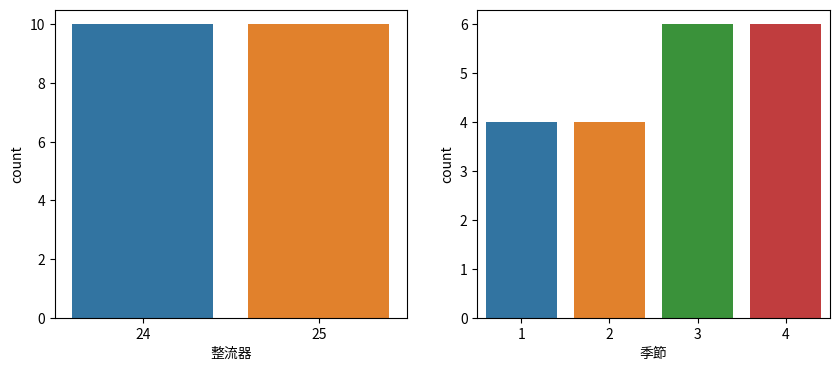

In [10]:
a = 1 ; b = 2 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (10, 4))
for i in range(a):
    for j in range(b):
        sns.countplot(data = rectifier, x = cat_feat_rectifier[k], ax = ax[j])
        k += 1

### corrosion

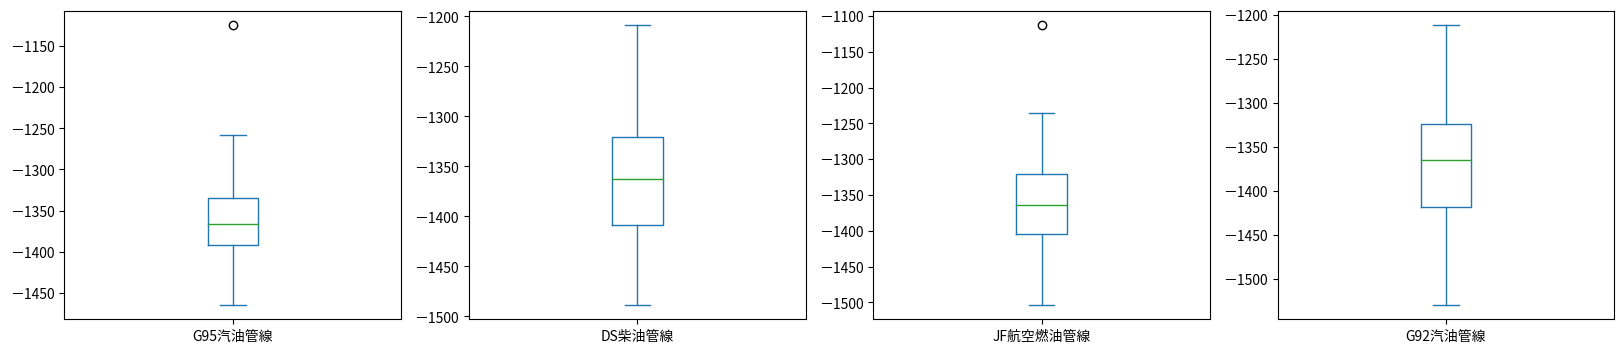

In [11]:
a = 1 ; b = 4 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (20, 4))
for i in range(a):
    for j in range(b):
        corrosion[num_feat_corrosion[k]].plot(kind = "box", ax = ax[j])
        k += 1

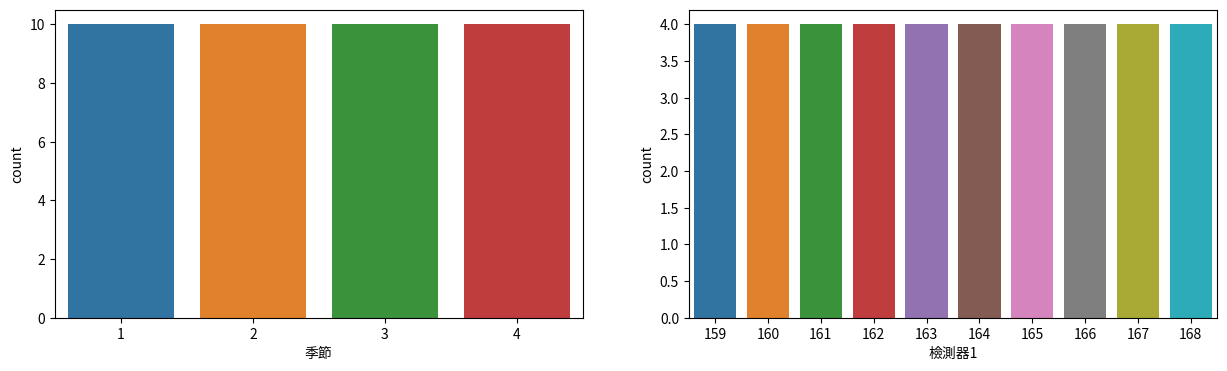

In [12]:
a = 1 ; b = 2 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (15, 4))
for i in range(a):
    for j in range(b):
        sns.countplot(data = corrosion, x = cat_feat_corrosion[k], ax = ax[j])
        k += 1

### all

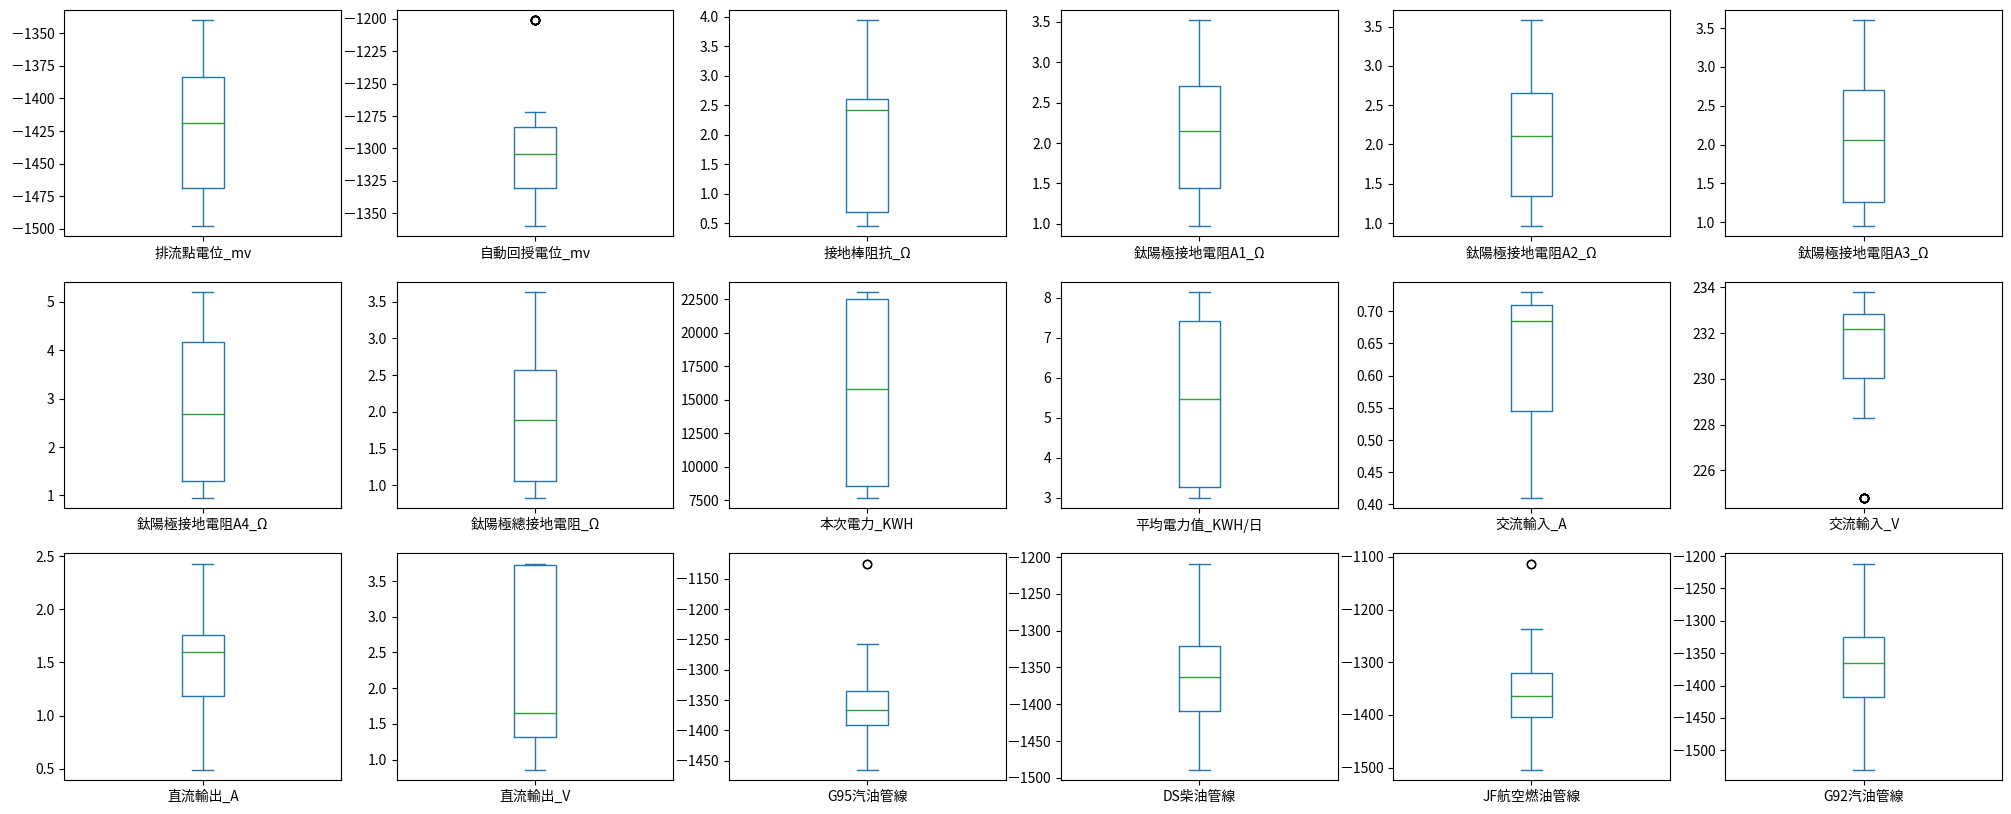

In [13]:
a = 3 ; b = 6 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        df_all[num_feat_all[k]].plot(kind = "box", ax = ax[i, j])
        k += 1

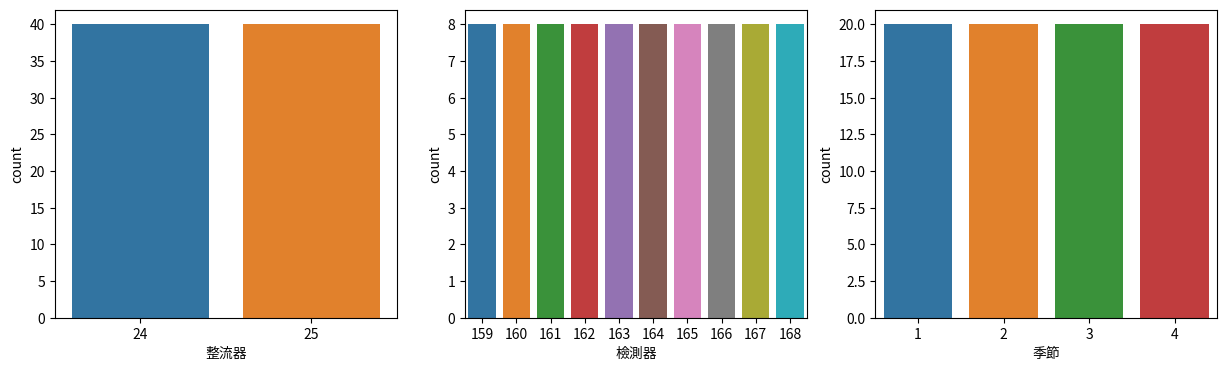

In [14]:
a = 1 ; b = 3 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (15, 4))
for i in range(a):
    for j in range(b):
        sns.countplot(data = df_all, x = cat_feat_all[k], ax = ax[j])
        k += 1

## Multivariate analysis

### rectifier

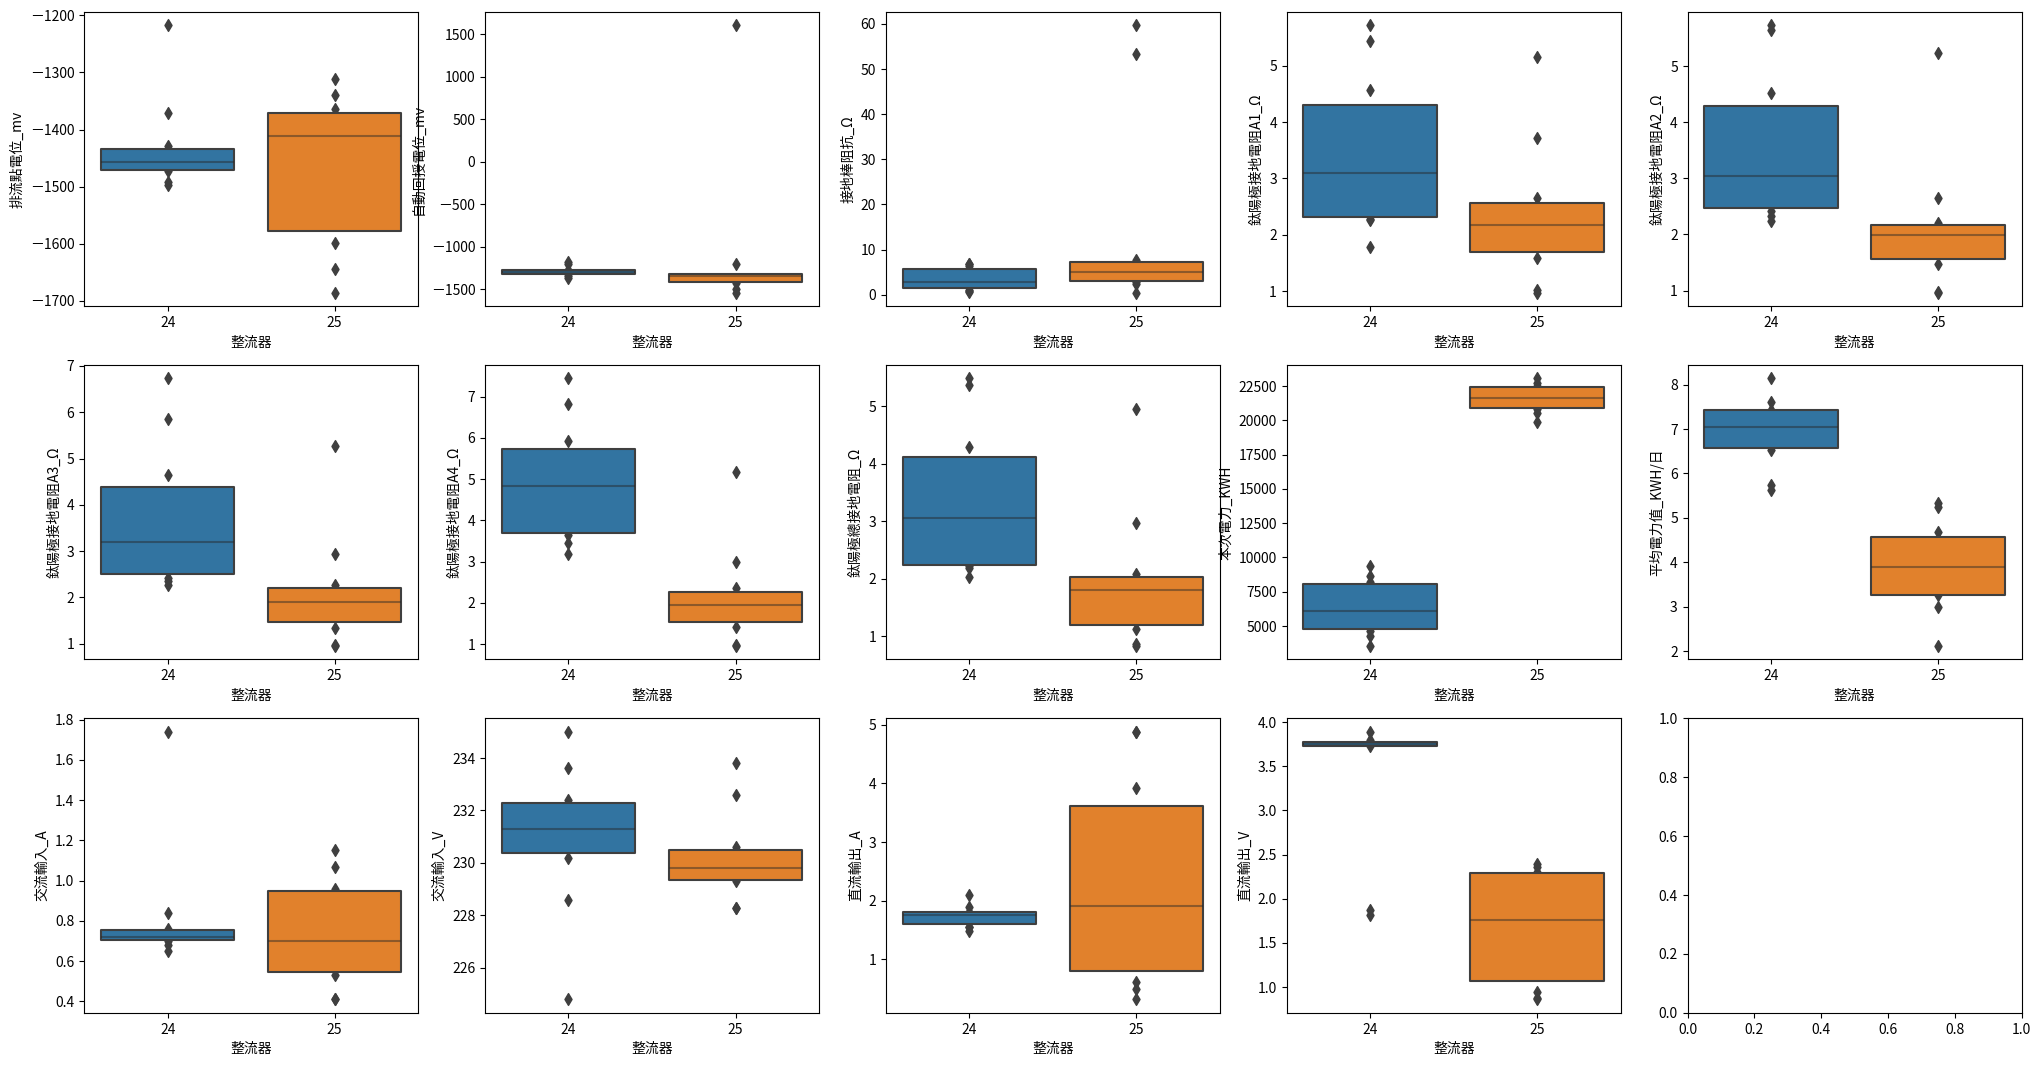

In [15]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_rectifier[k], x = "整流器", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

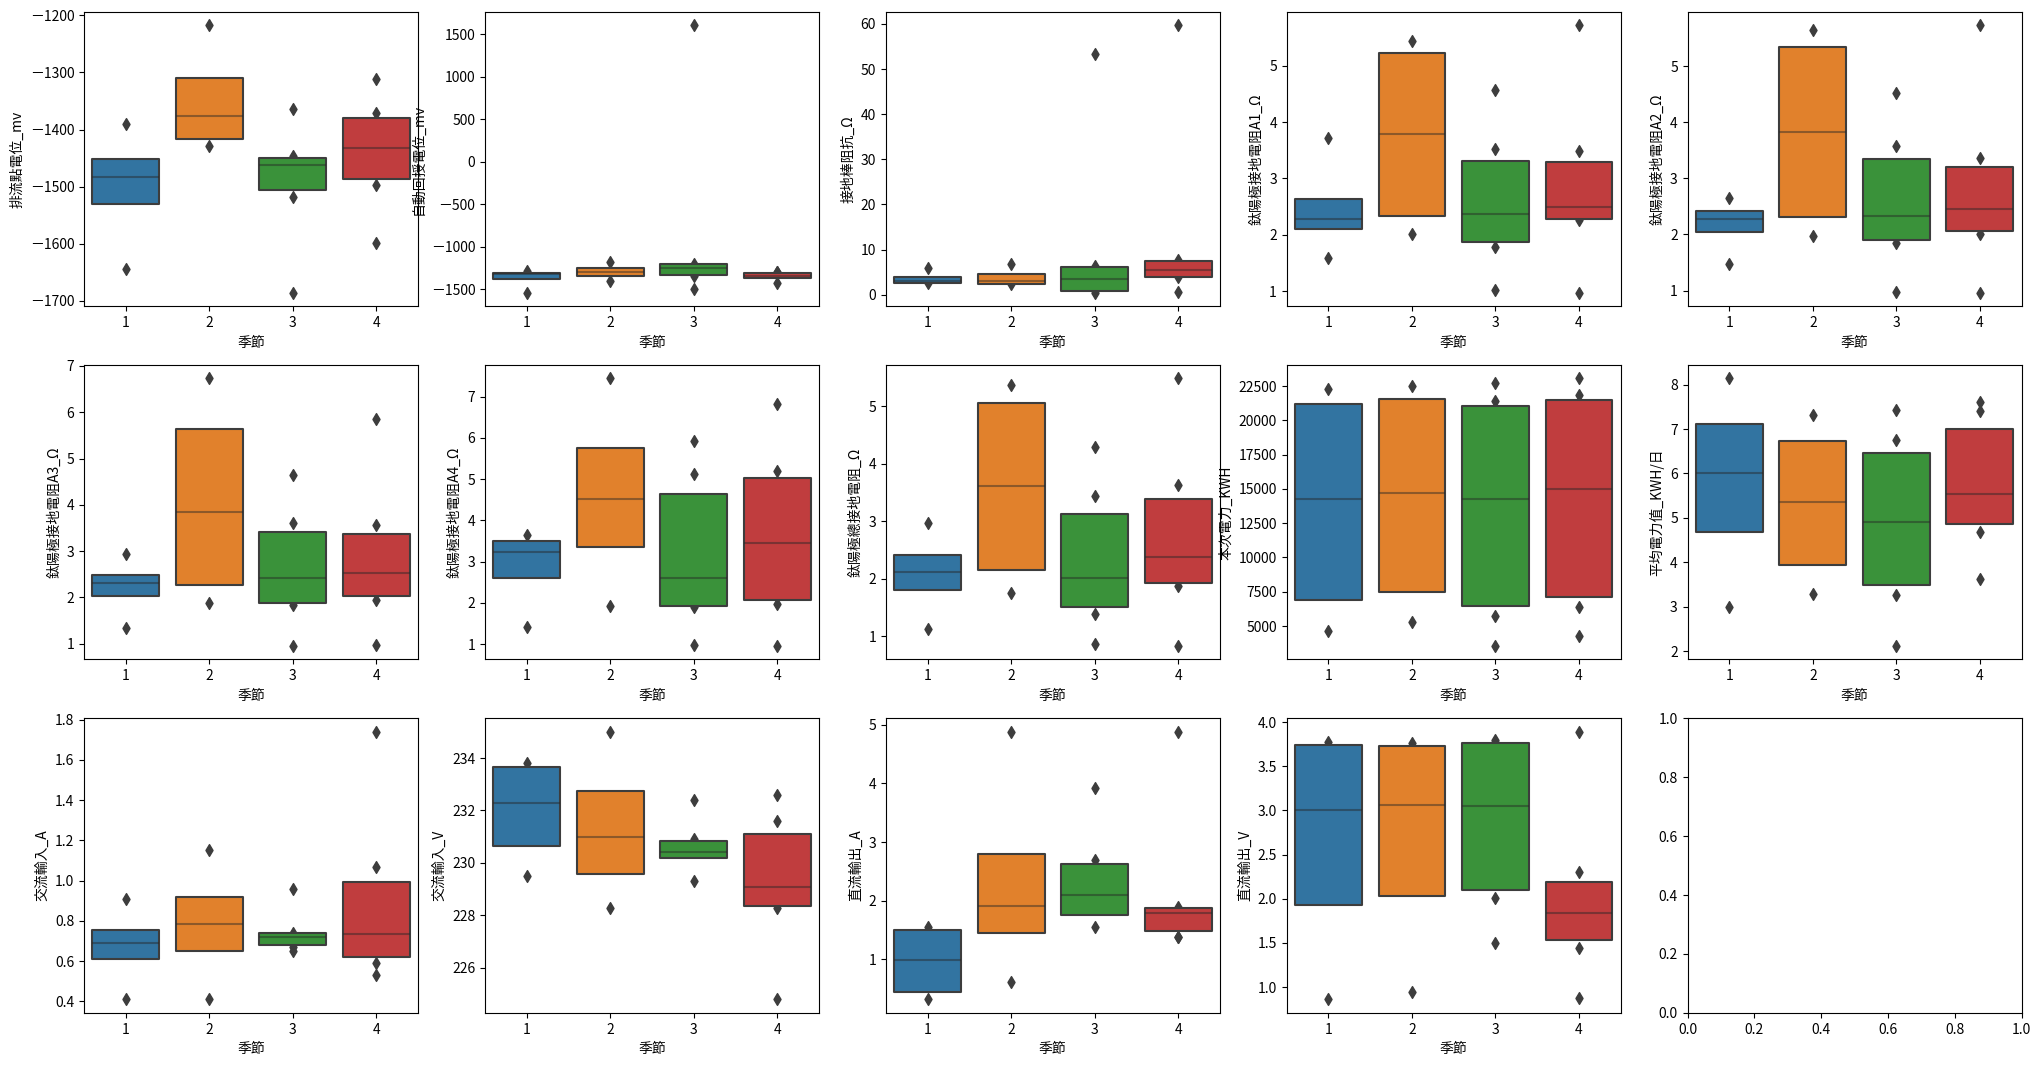

In [16]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_rectifier[k], x = "季節", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

### corrosion

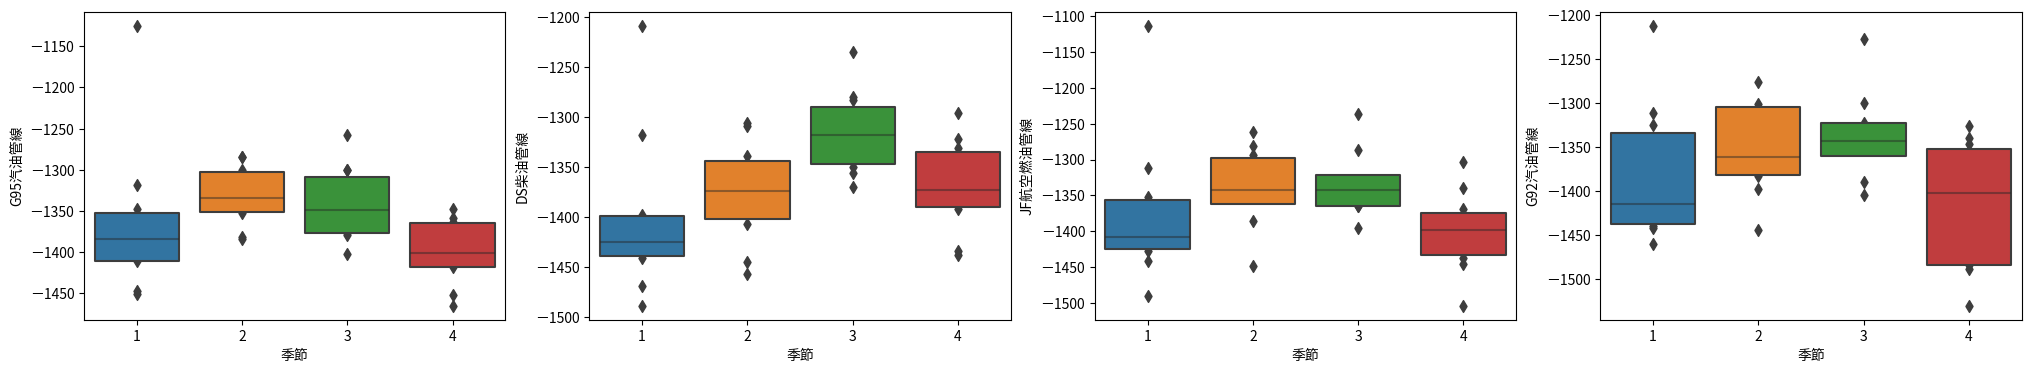

In [17]:
a = 1 ; b = 4 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 4))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_corrosion[k], x = "季節", data = corrosion, ax = ax[j])
        k += 1

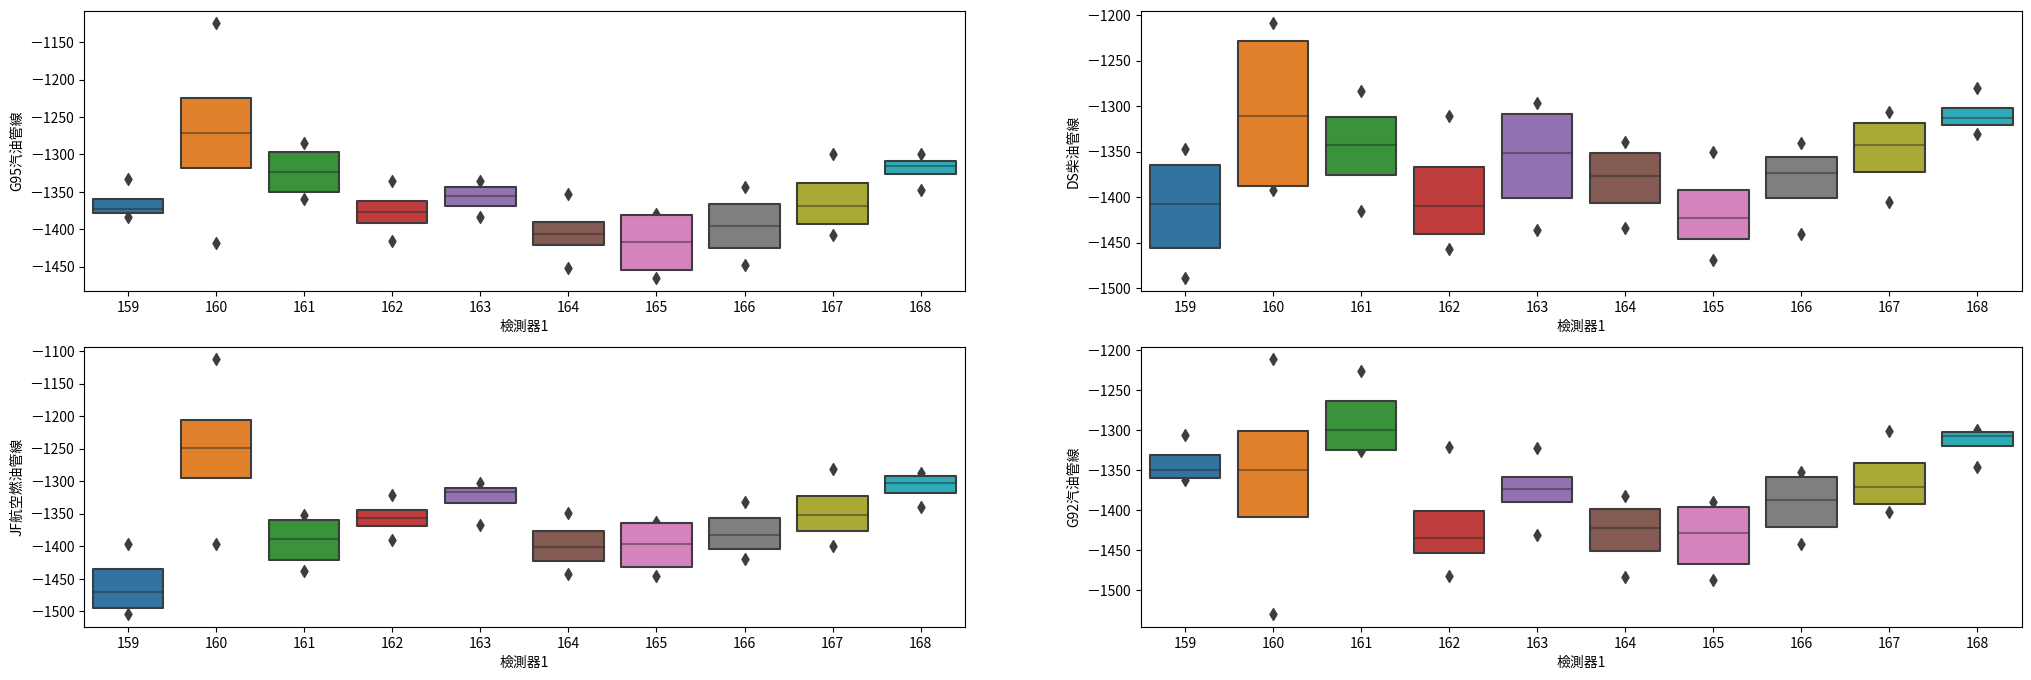

In [18]:
a = 2 ; b = 2 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 8))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_corrosion[k], x = "檢測器1", data = corrosion, ax = ax[i, j])
        k += 1

### all

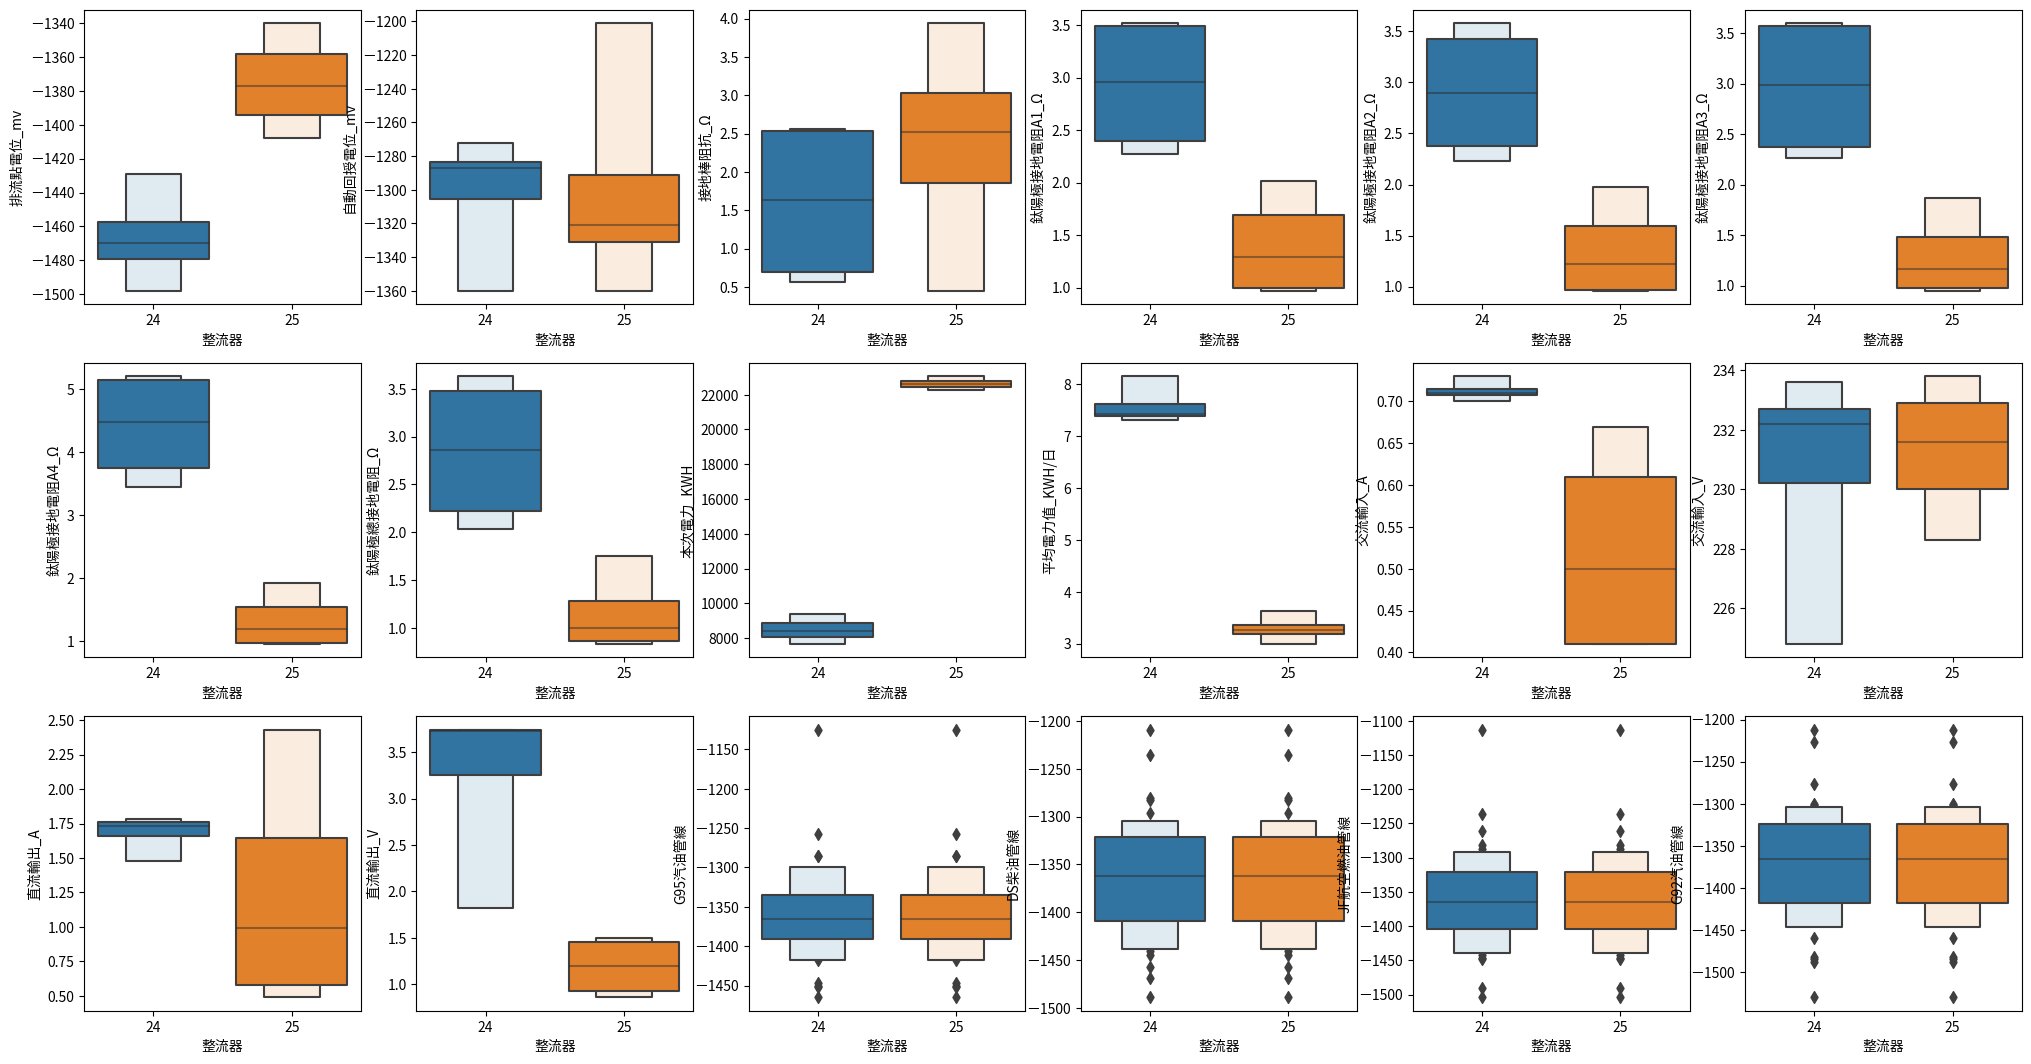

In [19]:
a = 3 ; b = 6 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_all[k], x = "整流器", data = df_all, ax = ax[i, j])
        k += 1

        if k == len(num_feat_all):
            break

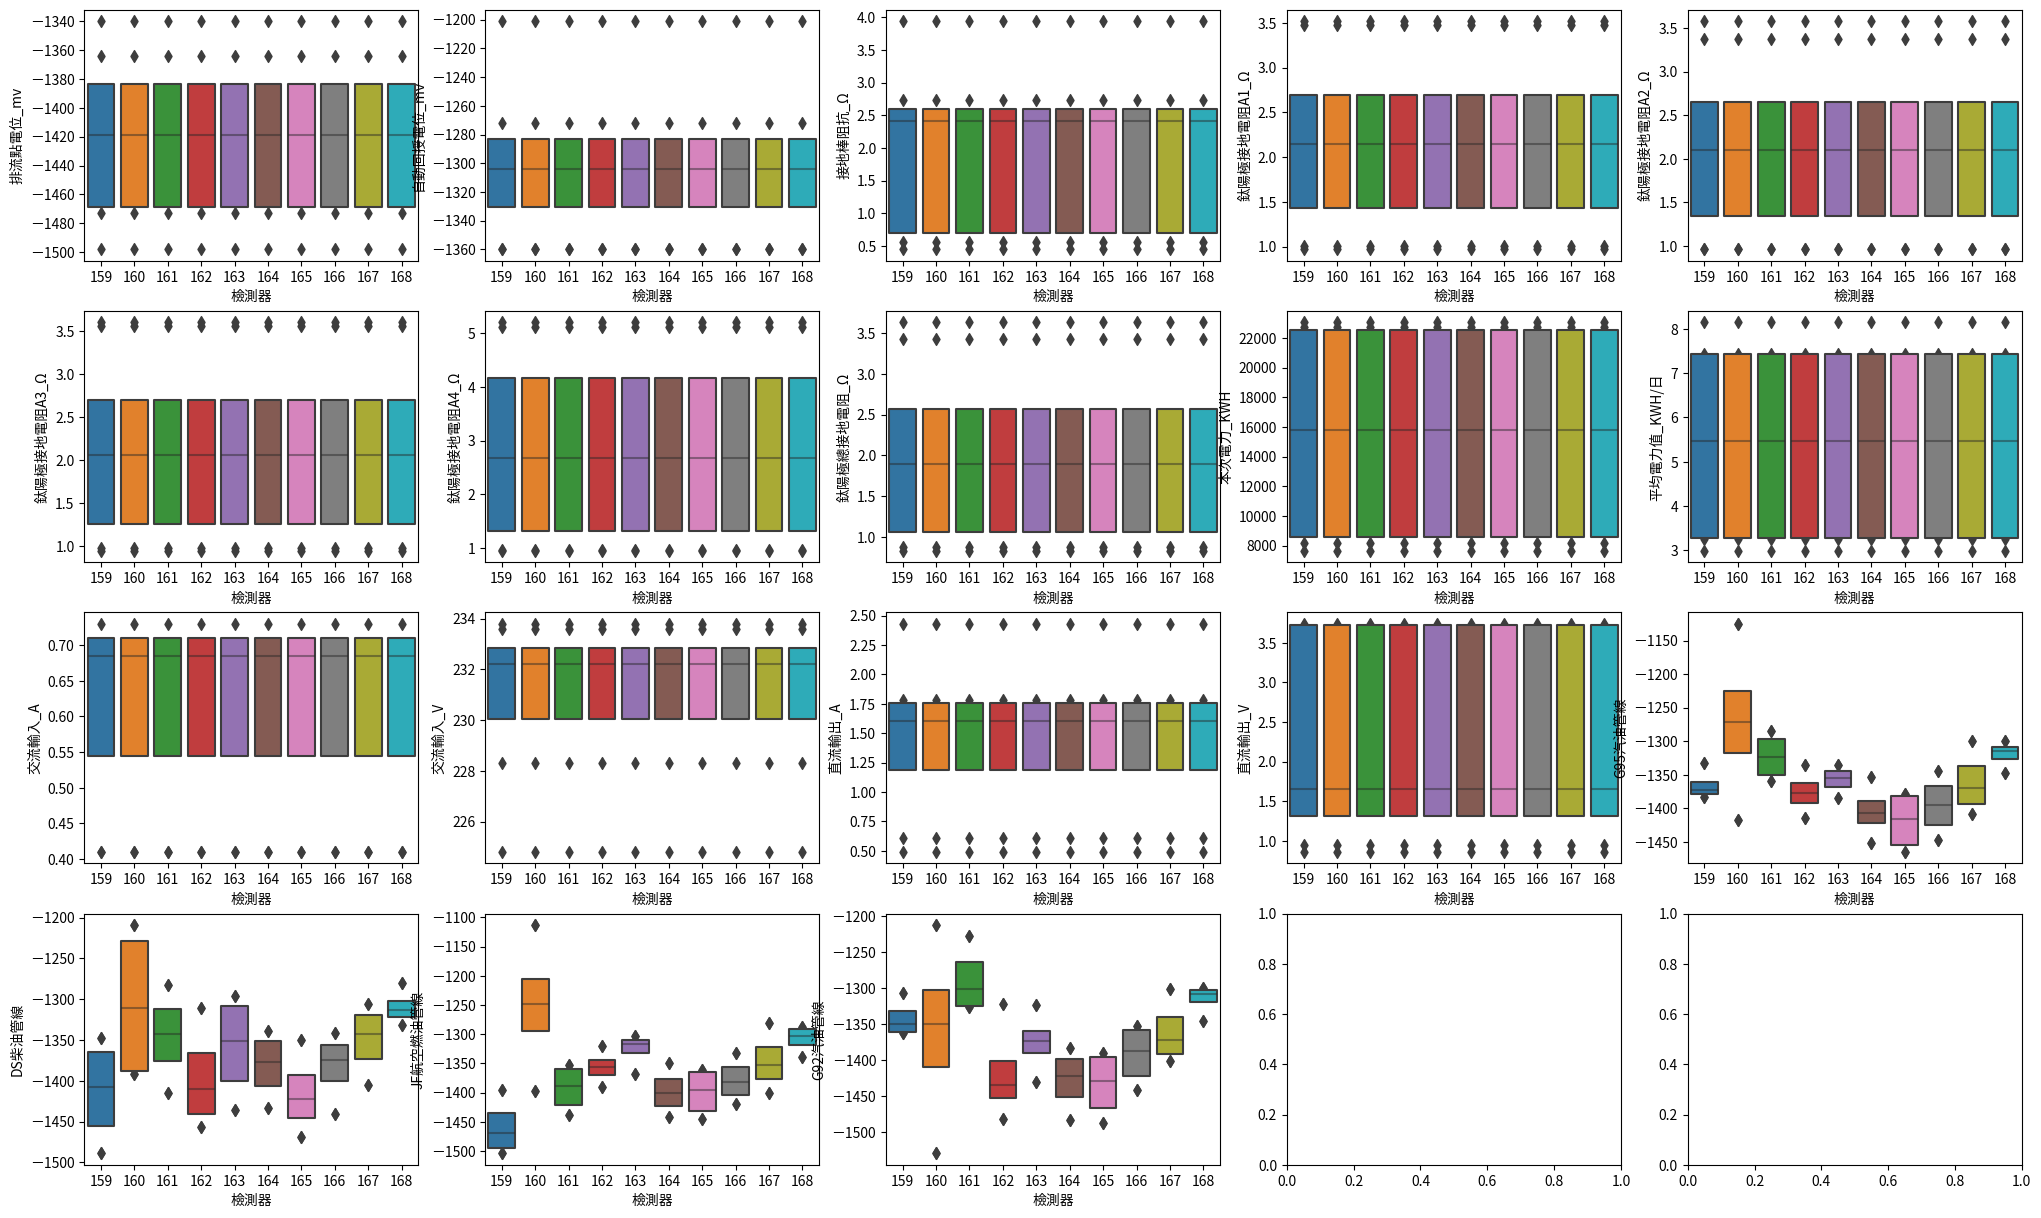

In [20]:
a = 4 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 15))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_all[k], x = "檢測器", data = df_all, ax = ax[i, j])
        k += 1

        if k == len(num_feat_all):
            break

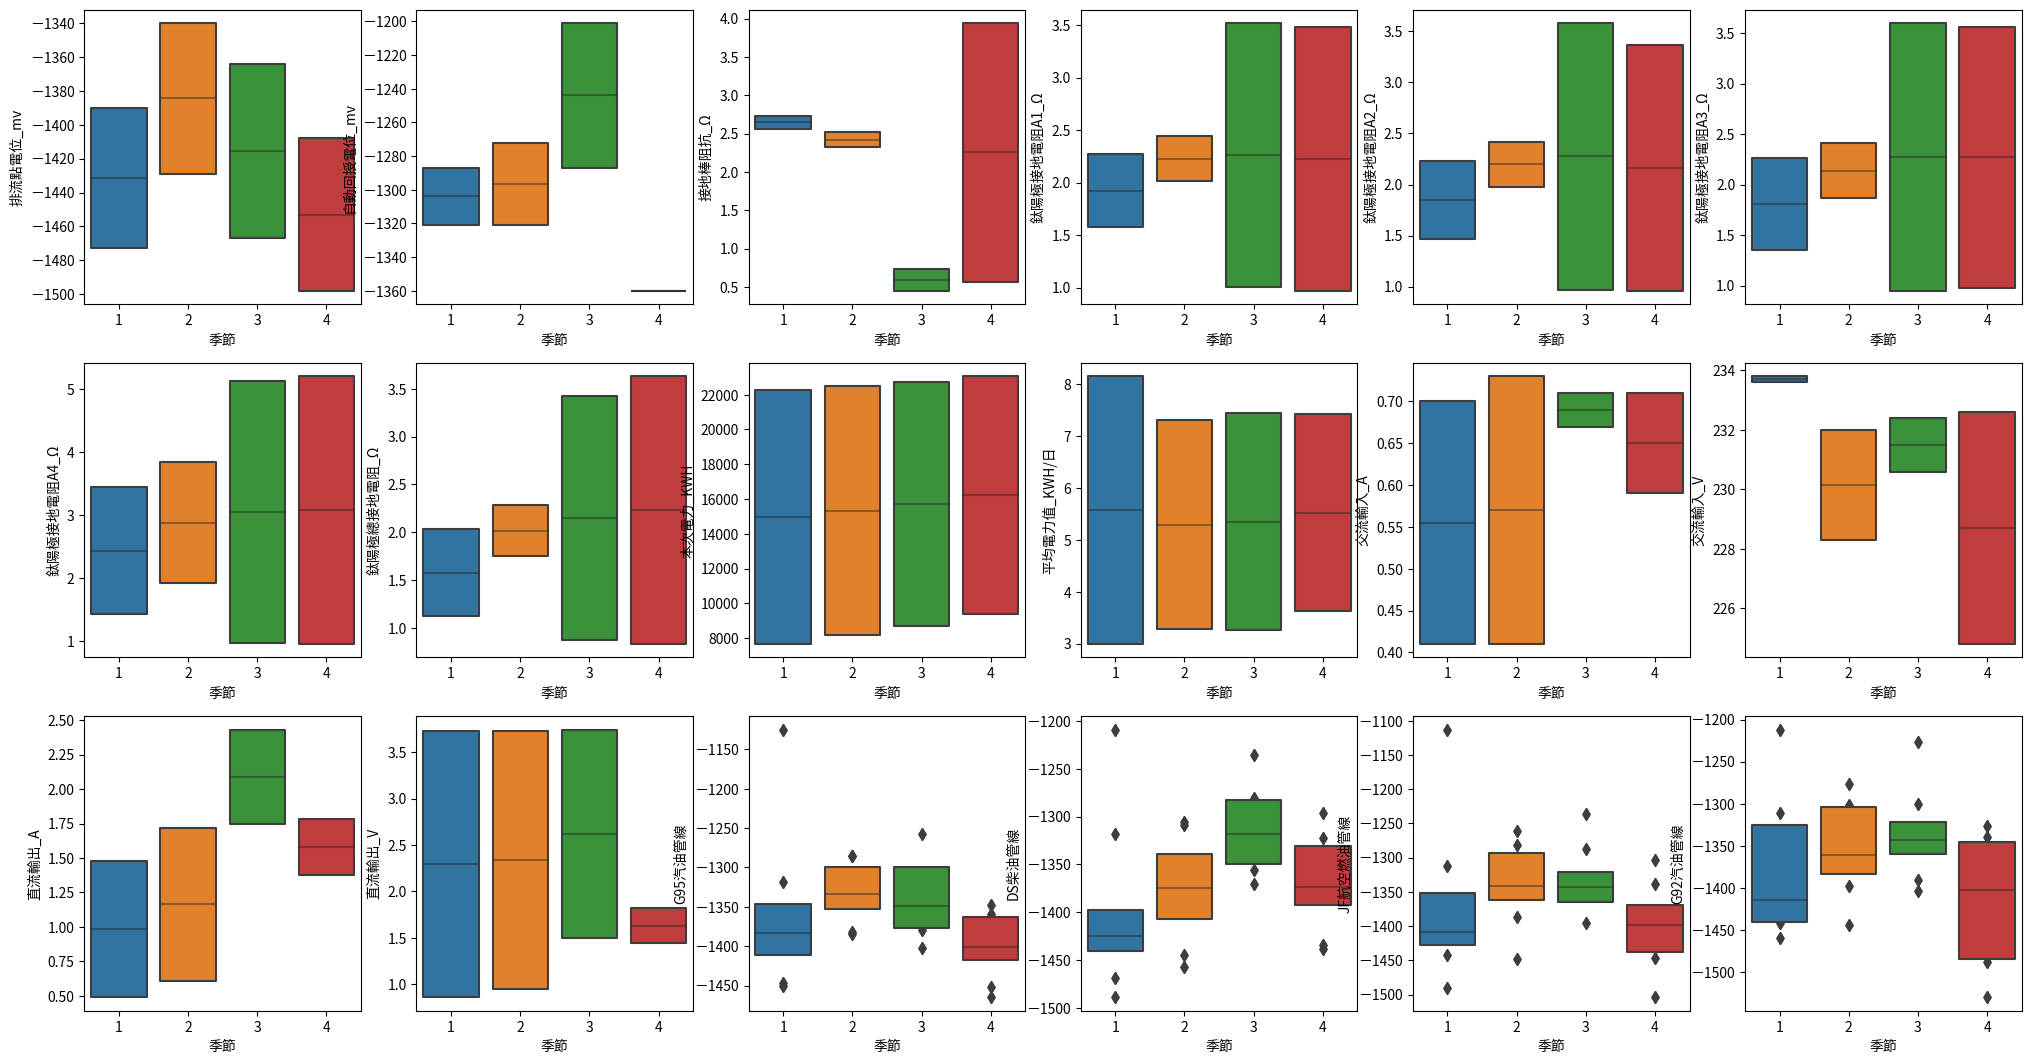

In [21]:
a = 3 ; b = 6 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 13))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_all[k], x = "季節", data = df_all, ax = ax[i, j])
        k += 1

        if k == len(num_feat_all):
            break

## Correlation between variables and Y

一開始以"排流點電位_mv"和"自動回授電位_mv"作為Y

### rectifier

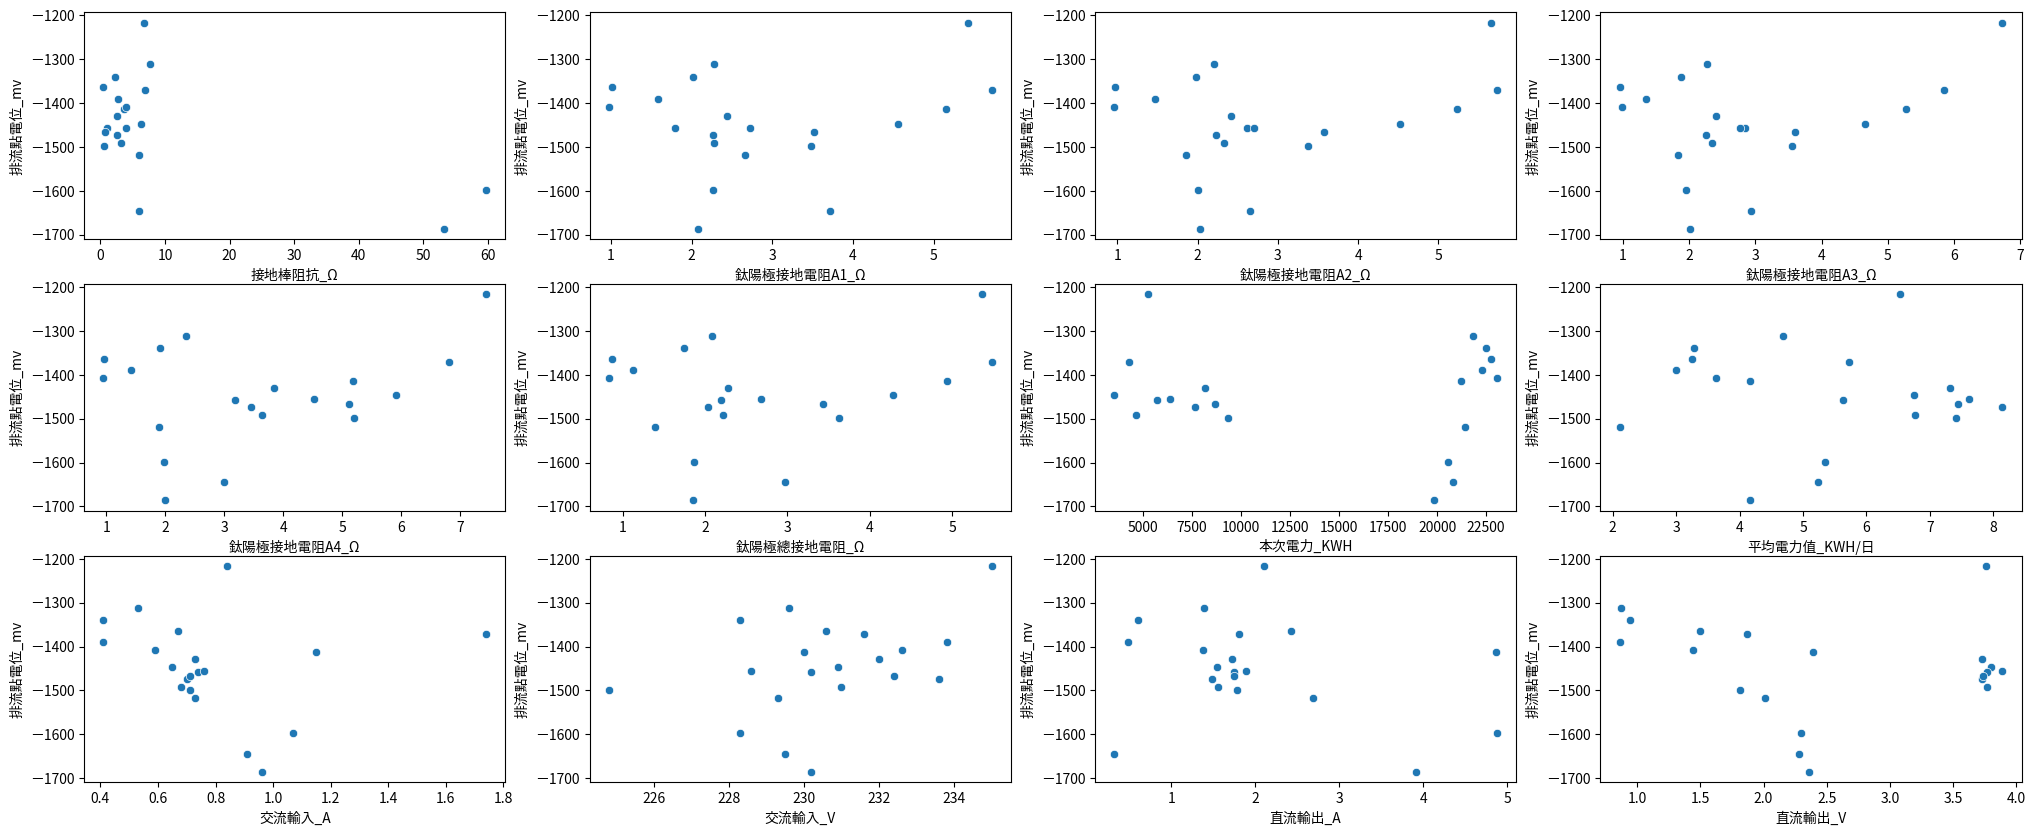

In [22]:
a = 3 ; b = 4 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat_rectifier[k], y = "排流點電位_mv", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

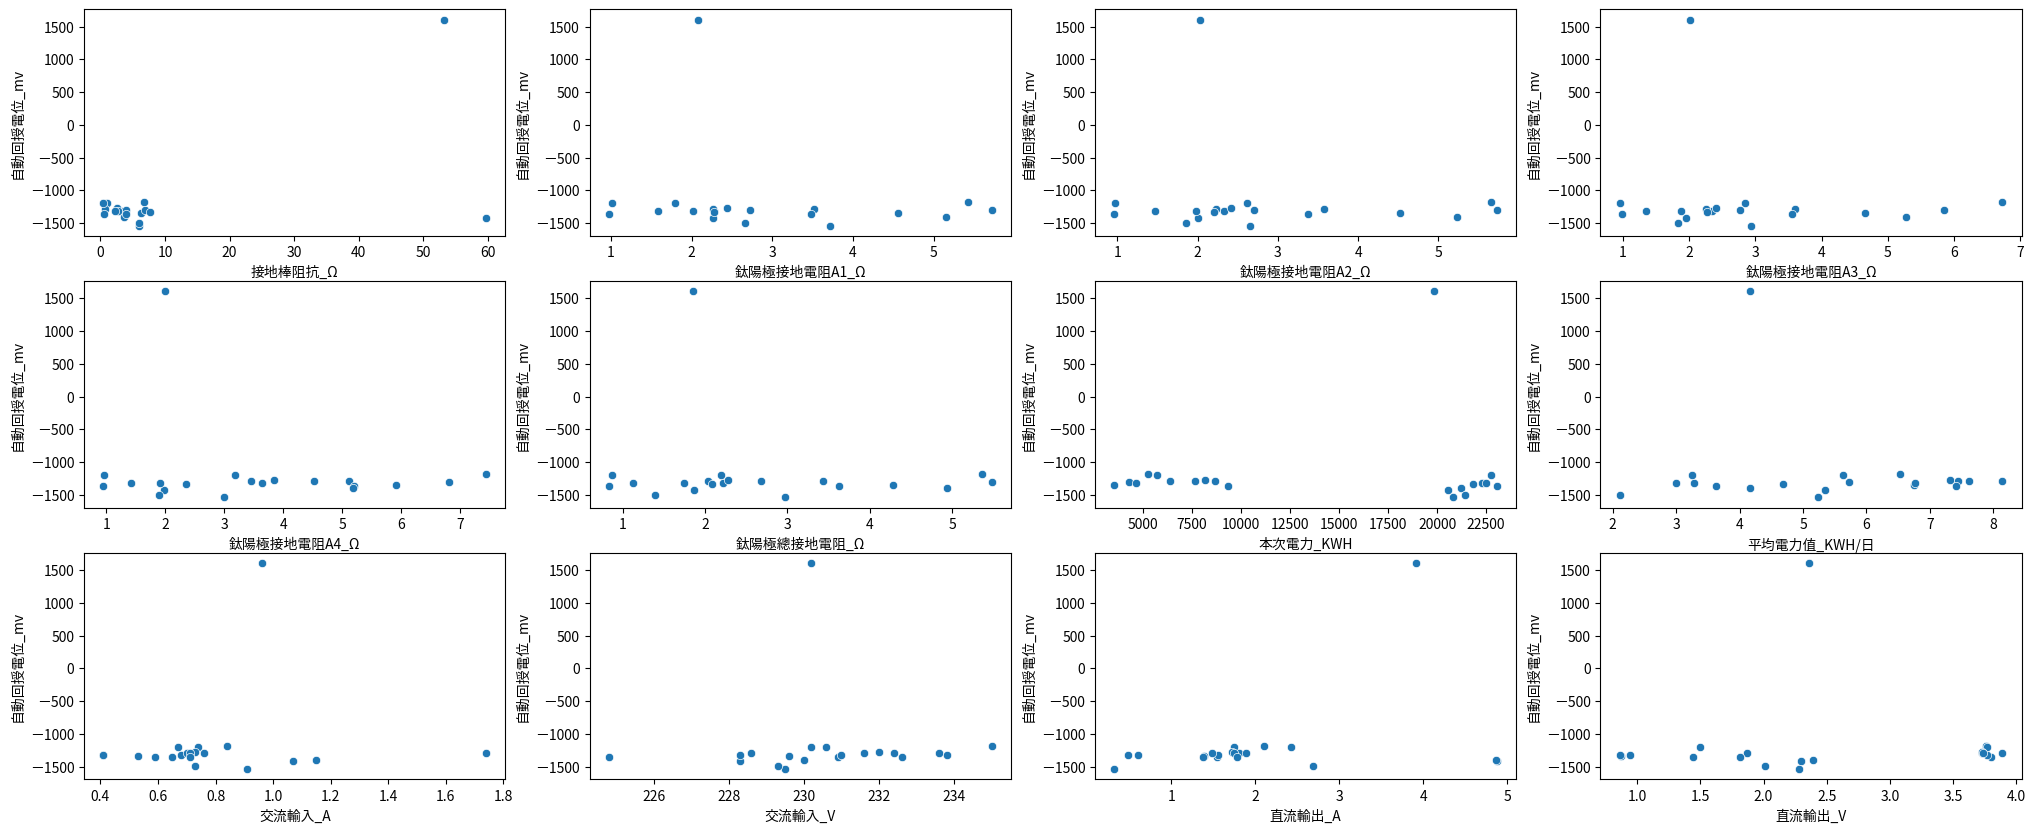

In [23]:
a = 3 ; b = 4 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat_rectifier[k], y = "自動回授電位_mv", data = rectifier, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

### all

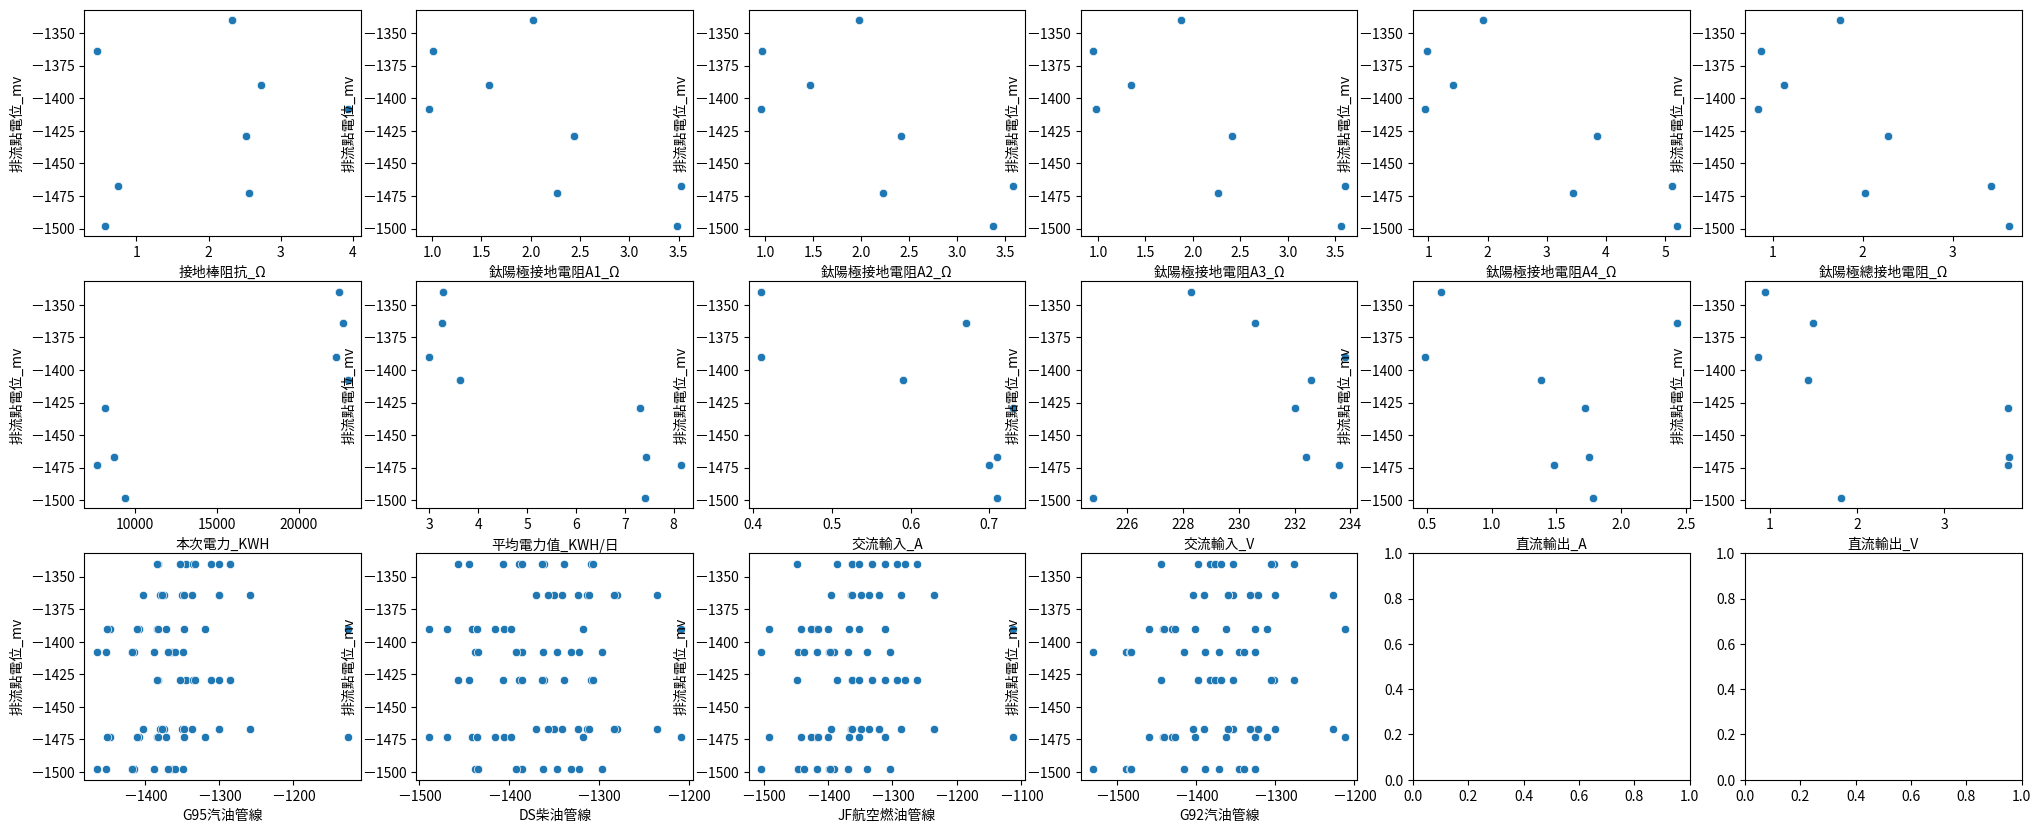

In [24]:
a = 3 ; b = 6 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat_all[k], y = "排流點電位_mv", data = df_all, ax = ax[i, j])
        k += 1

        if k == len(num_feat_all):
            break

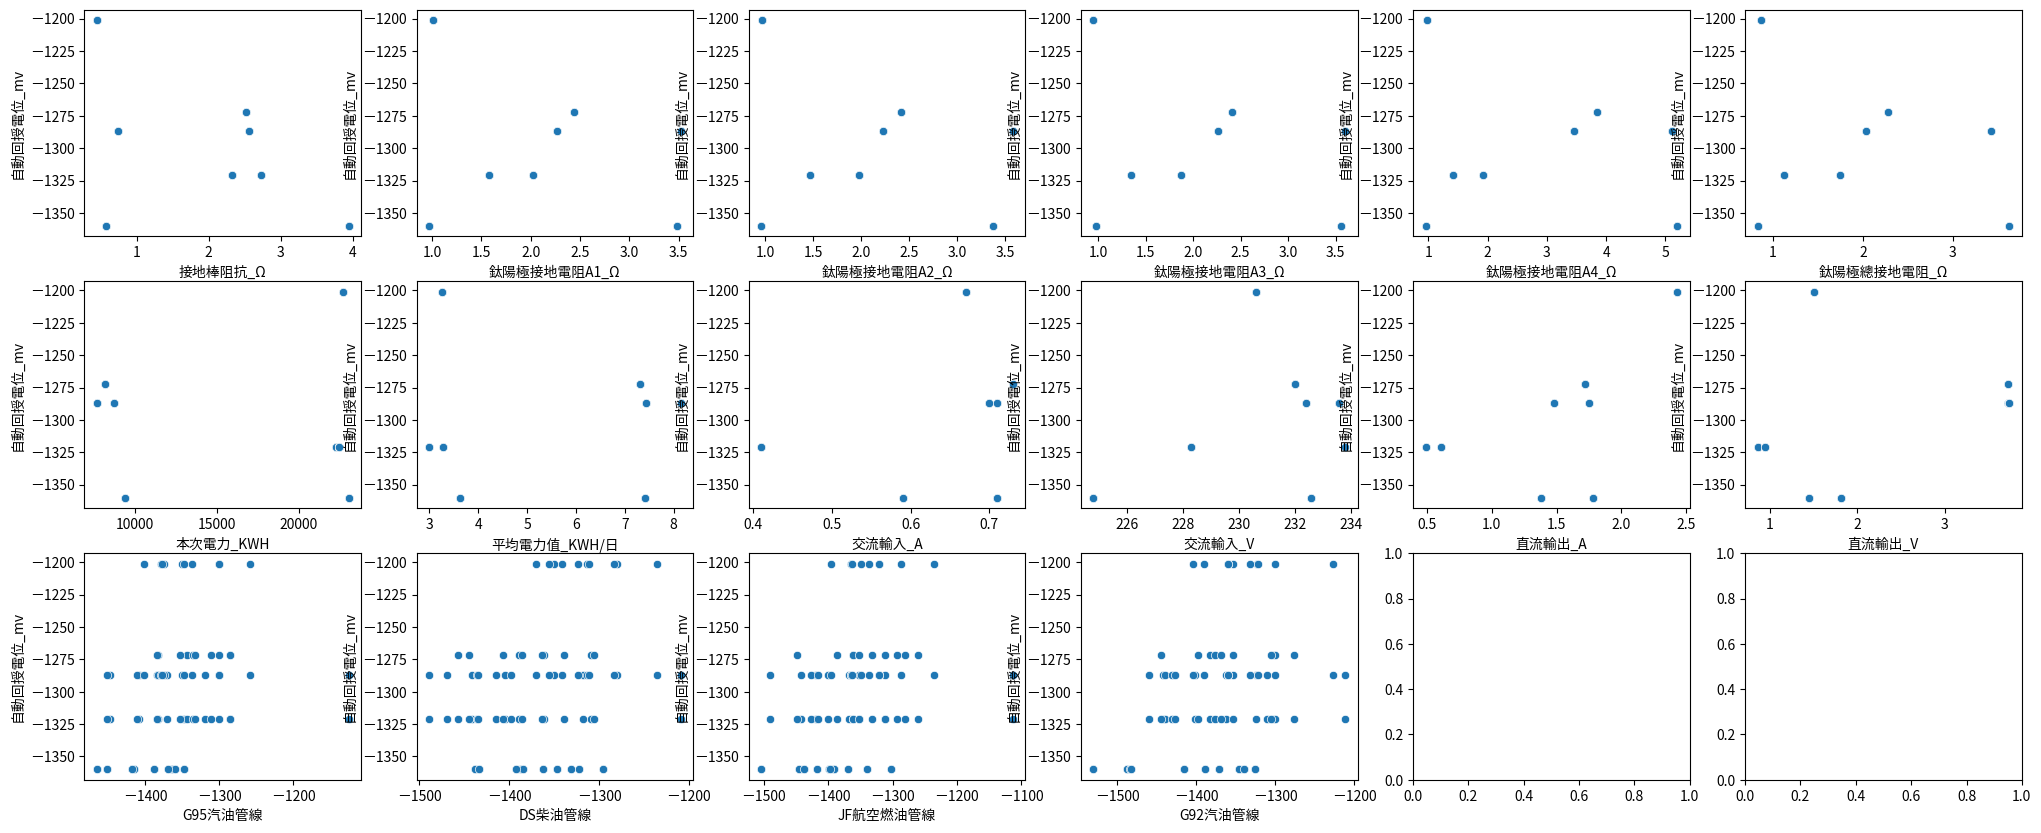

In [25]:
a = 3 ; b = 6 ; k = 2
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.scatterplot(x = num_feat_all[k], y = "自動回授電位_mv", data = df_all, ax = ax[i, j])
        k += 1

        if k == len(num_feat_all):
            break

## Correlation between variables

### rectifier

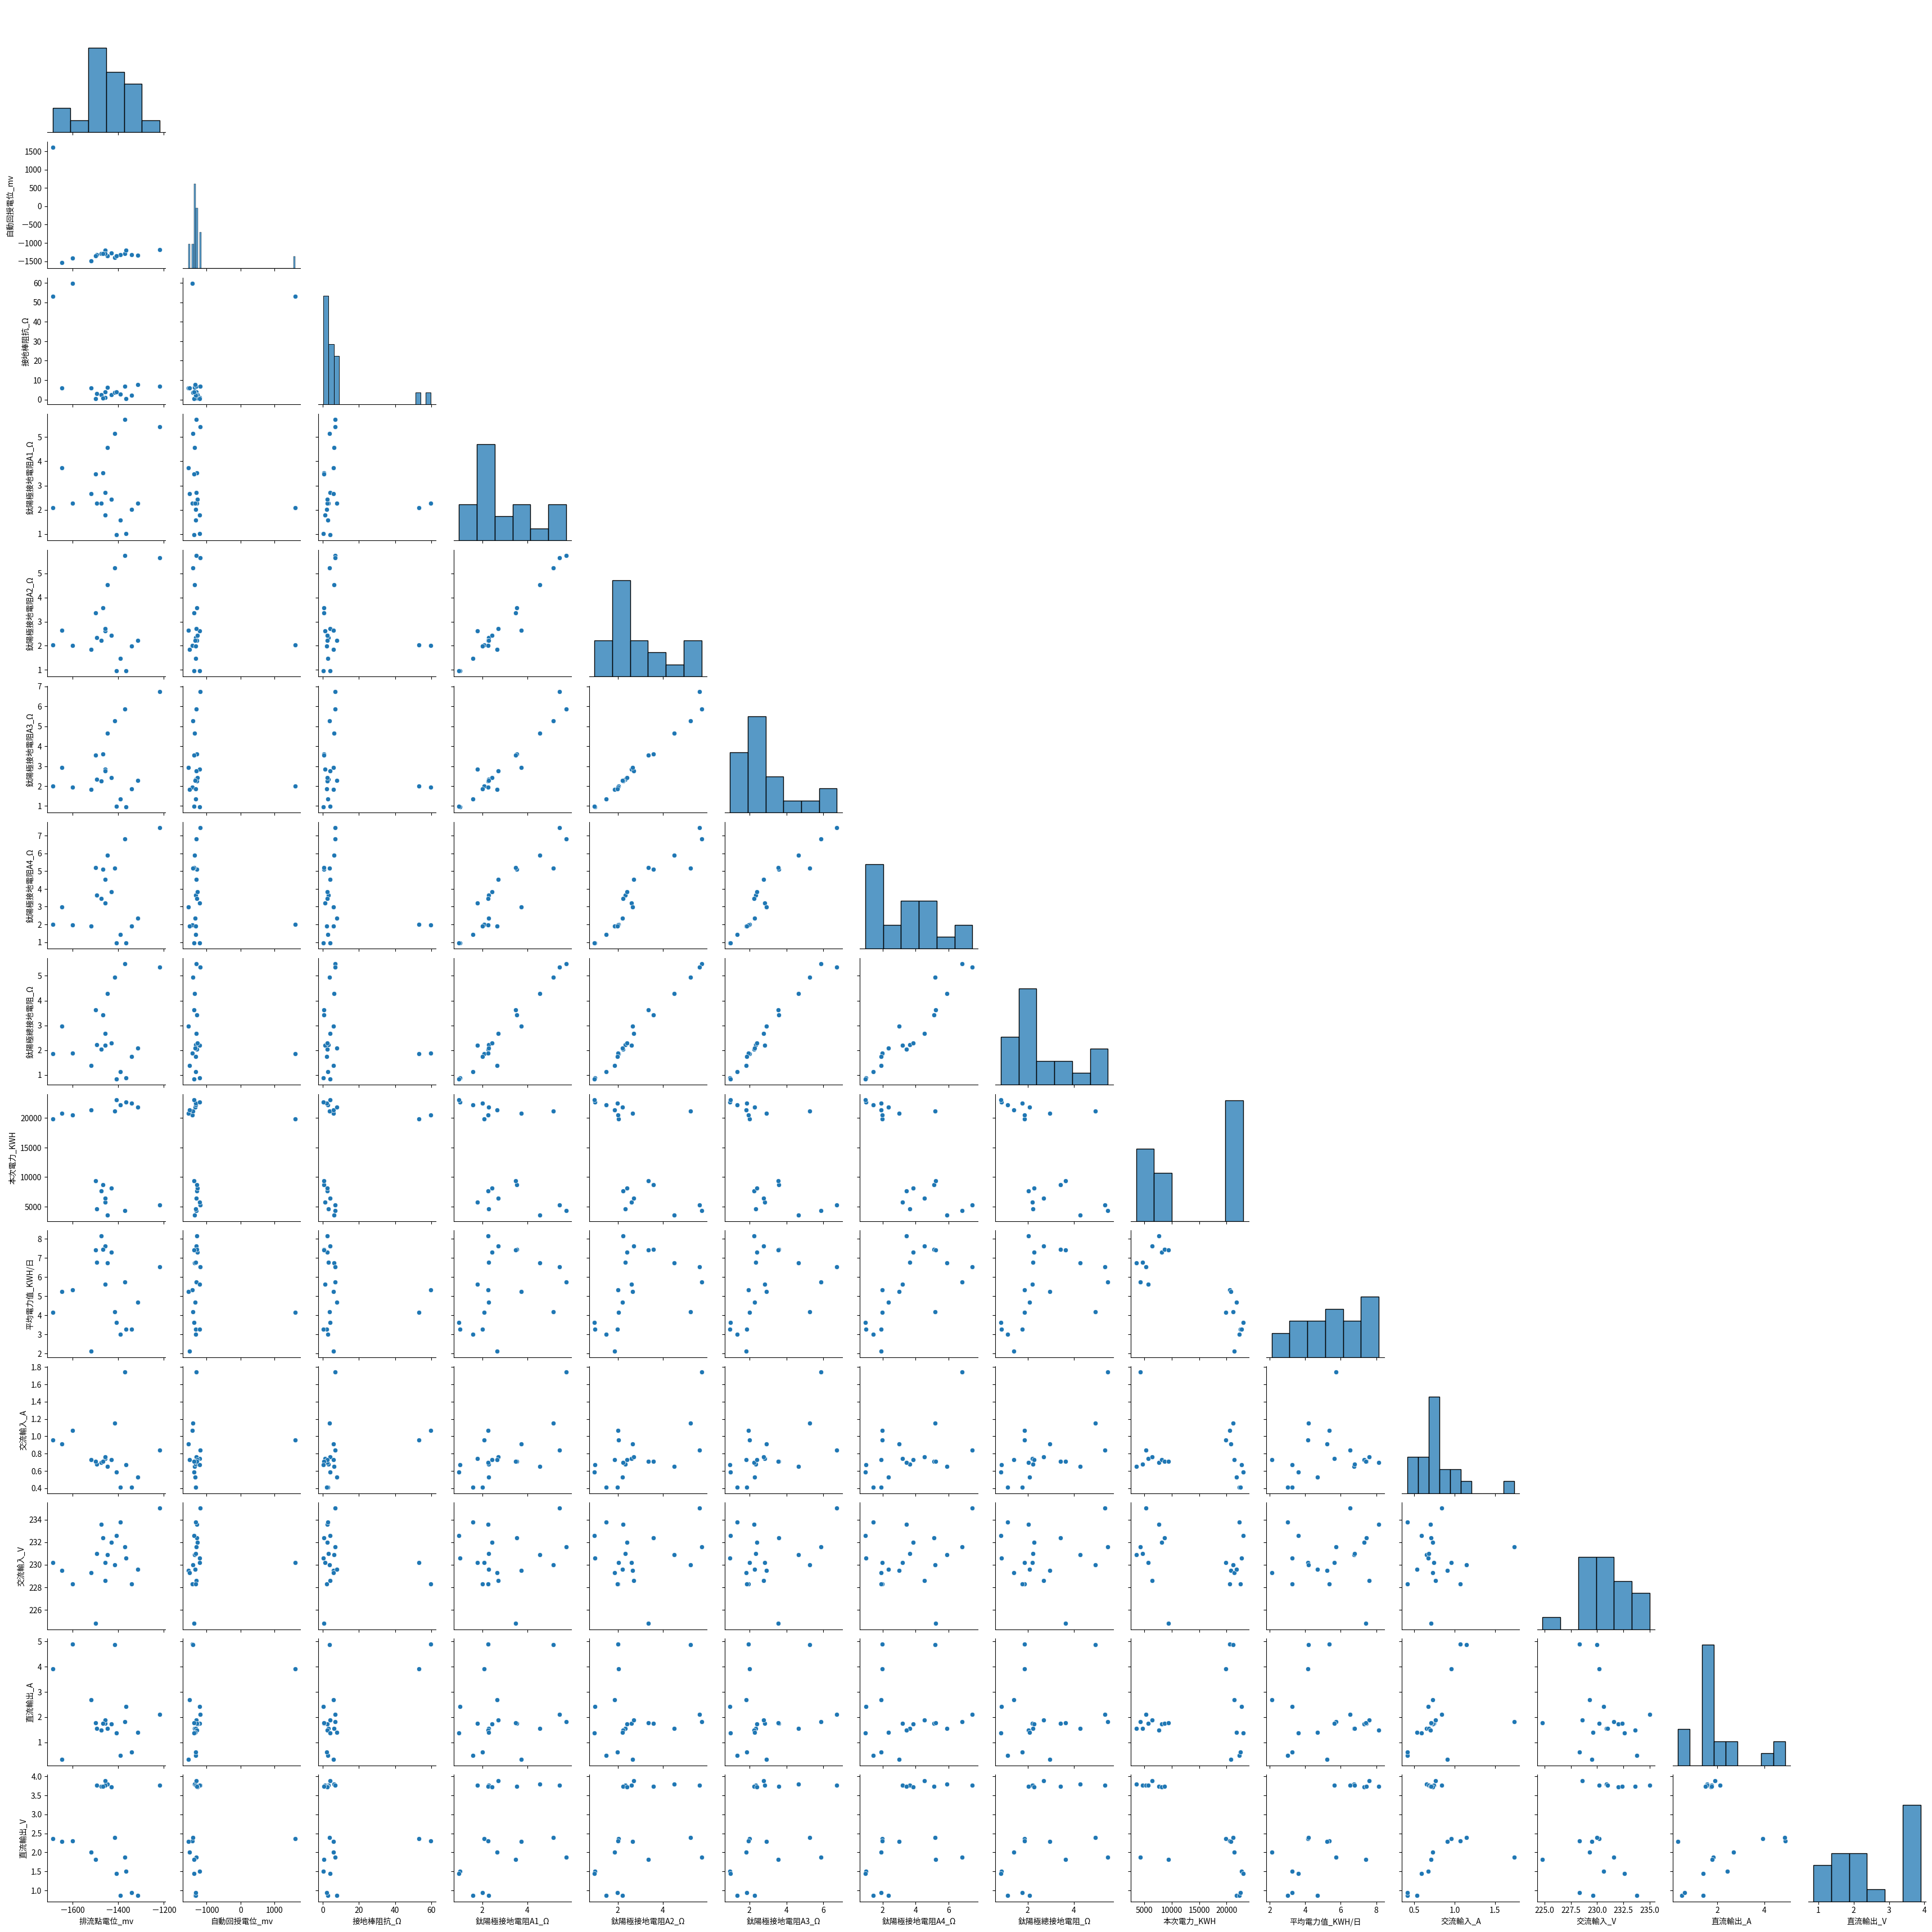

In [26]:
sns.pairplot(rectifier[num_feat_rectifier], corner=True)

### all

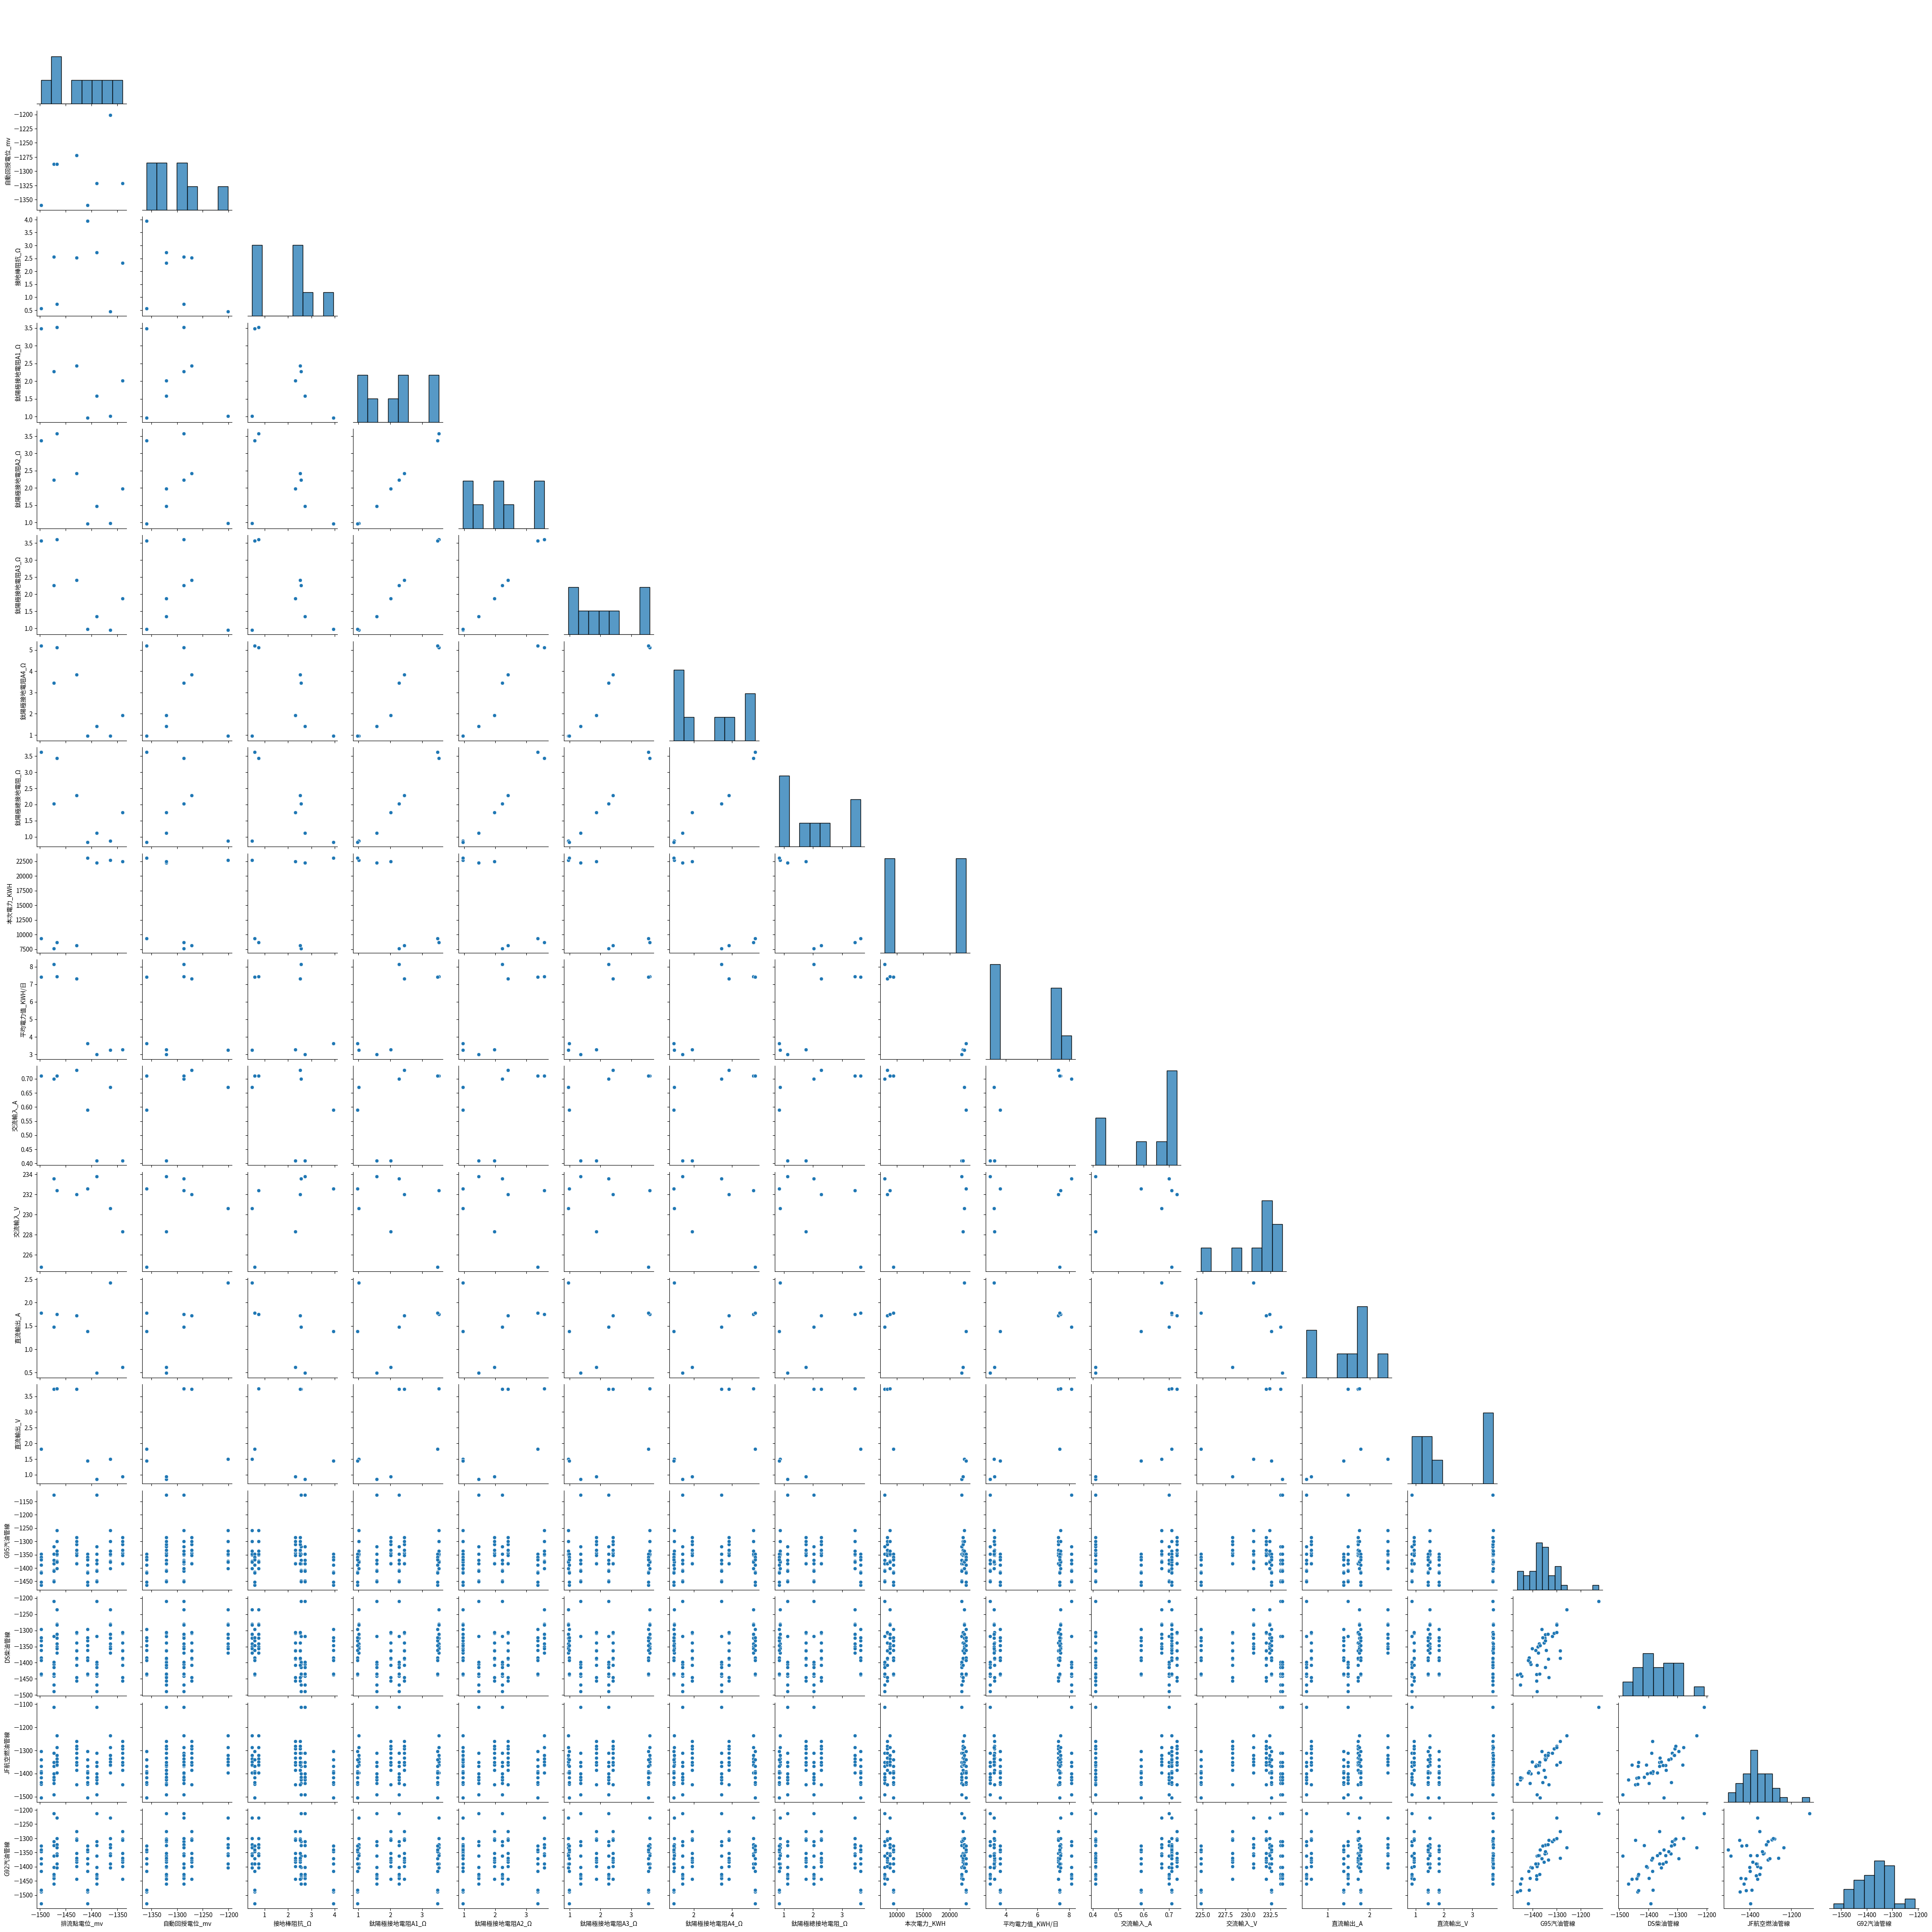

In [27]:
sns.pairplot(df_all[num_feat_all], corner=True)

## Grouping Analysis

In [28]:
rectifier = pd.read_csv("data/parser/group.csv")
rectifier["hdbscan"] = rectifier["hdbscan"].astype(int)
rectifier["kmeans"] = rectifier["kmeans"].astype(int)

rectifier_24 = rectifier.loc[:9]
rectifier_25 = rectifier.loc[10:]

In [29]:
rectifier_24

整流器     項目                 檢測日期  排流點電位_mv  自動回授電位_mv  接地棒阻抗_Ω  鈦陽極接地電阻A1_Ω   
0   24  109Q3  2020-07-21 00:00:00     -1447      -1348     6.32         4.56  \
1   24  109Q4  2020-12-01 00:00:00     -1371      -1298     6.86         5.72   
2   24  110Q1  2021-01-22 00:00:00     -1492      -1318     3.20         2.28   
3   24  110Q2  2021-04-29 00:00:00     -1217      -1182     6.82         5.43   
4   24  110Q3  2021-07-20 00:00:00     -1457      -1198     1.10         1.79   
5   24  110Q4  2021-10-14 00:00:00     -1456      -1294     3.96         2.72   
6   24  111Q1  2022-03-17 00:00:00     -1473      -1287     2.56         2.27   
7   24  111Q2  2022-05-27 00:00:00     -1429      -1272     2.52         2.44   
8   24  111Q3  2022-08-03 00:00:00     -1467      -1287     0.74         3.52   
9   24  111Q4  2022-11-03 00:00:00     -1498      -1360     0.57         3.48   

   鈦陽極接地電阻A2_Ω  鈦陽極接地電阻A3_Ω  鈦陽極接地電阻A4_Ω  鈦陽極總接地電阻_Ω  本次電力_KWH  平均電力值_KWH/日   
0         4.52         4.65         5.91        4.28      3541     6.750000  \
1         5.73         5.85         6.81        5.48      4303     5.730000   
2         2.33         2.35         3.64        2.22      4655     6.770000   
3         5.65         6.73         7.44        5.36      5288     6.530000   
4         2.61         2.84         3.19        2.19      5750     5.634146   
5         2.70         2.77         4.53        2.68      6405     7.616279   
6         2.23         2.26         3.45        2.03      7659     8.142857   
7         2.42         2.41         3.84        2.28      8178     7.309859   
8         3.58         3.60         5.12        3.43      8684     7.441176   
9         3.37         3.56         5.20        3.63      9366     7.413043   

   交流輸入_A  交流輸入_V  直流輸出_A  直流輸出_V  hdbscan  kmeans  
0    0.65   230.9    1.55   3.800        0       2  
1    1.74   231.6    1.81   1.870        0       2  
2    0.68   231.0    1.56   3.770        0       2  
3    0.84   235.0    2.10   3.760        0       0  
4    0.74   230.2    1.75   3.770        0       0  
5    0.76   228.6    1.89   3.892        0       0  
6    0.70   233.6    1.48   3.731        1       1  
7    0.73   232.0    1.72   3.726        1       1  
8    0.71   232.4    1.75   3.741        1       1  
9    0.71   224.8    1.78   1.817        1       1

In [30]:
rectifier_25

整流器     項目                 檢測日期  排流點電位_mv  自動回授電位_mv  接地棒阻抗_Ω   
10   25  109Q3  2020-07-20 00:00:00     -1686       1605    53.20  \
11   25  109Q4  2020-12-01 00:00:00     -1598      -1421    59.70   
12   25  110Q1  2021-01-20 00:00:00     -1645      -1539     5.98   
13   25  110Q2  2021-04-28 00:00:00     -1413      -1402     3.72   
14   25  110Q3  2021-07-19 00:00:00     -1518      -1498     5.93   
15   25  110Q4  2021-10-14 00:00:00     -1312      -1336     7.65   
16   25  111Q1  2022-03-17 00:00:00     -1390      -1321     2.73   
17   25  111Q2  2022-05-25 00:00:00     -1340      -1321     2.32   
18   25  111Q3  2022-08-03 00:00:00     -1364      -1201     0.45   
19   25  111Q4  2022-11-02 00:00:00     -1408      -1360     3.94   

    鈦陽極接地電阻A1_Ω  鈦陽極接地電阻A2_Ω  鈦陽極接地電阻A3_Ω  鈦陽極接地電阻A4_Ω  鈦陽極總接地電阻_Ω  本次電力_KWH   
10         2.08         2.03         2.01         1.99        1.85     19842  \
11         2.27         2.01         1.95         1.98        1.87     20557   
12         3.72         2.65         2.93         2.99        2.97     20819   
13         5.15         5.23         5.27         5.18        4.94     21228   
14         2.66         1.85         1.83         1.90        1.39     21401   
15         2.28         2.21         2.27         2.36        2.09     21809   
16         1.58         1.47         1.35         1.42        1.12     22270   
17         2.02         1.98         1.87         1.92        1.75     22496   
18         1.01         0.97         0.95         0.97        0.87     22724   
19         0.97         0.96         0.98         0.95        0.83     23054   

    平均電力值_KWH/日  交流輸入_A  交流輸入_V  直流輸出_A  直流輸出_V  hdbscan  kmeans  
10     4.160000    0.96   230.2    3.92   2.360       -1       1  
11     5.340000    1.07   228.3    4.88   2.300       -1       2  
12     5.240000    0.91   229.5    0.32   2.280        0       2  
13     4.170000    1.15   230.0    4.87   2.390        0       2  
14     2.109756    0.73   229.3    2.69   2.010        1       2  
15     4.689655    0.53   229.6    1.39   0.873        1       0  
16     2.993506    0.41   233.8    0.49   0.860        2       0  
17     3.275362    0.41   228.3    0.61   0.945        2       0  
18     3.257143    0.67   230.6    2.43   1.500        2       0  
19     3.626374    0.59   232.6    1.38   1.443       -1       0

### rectifier_24

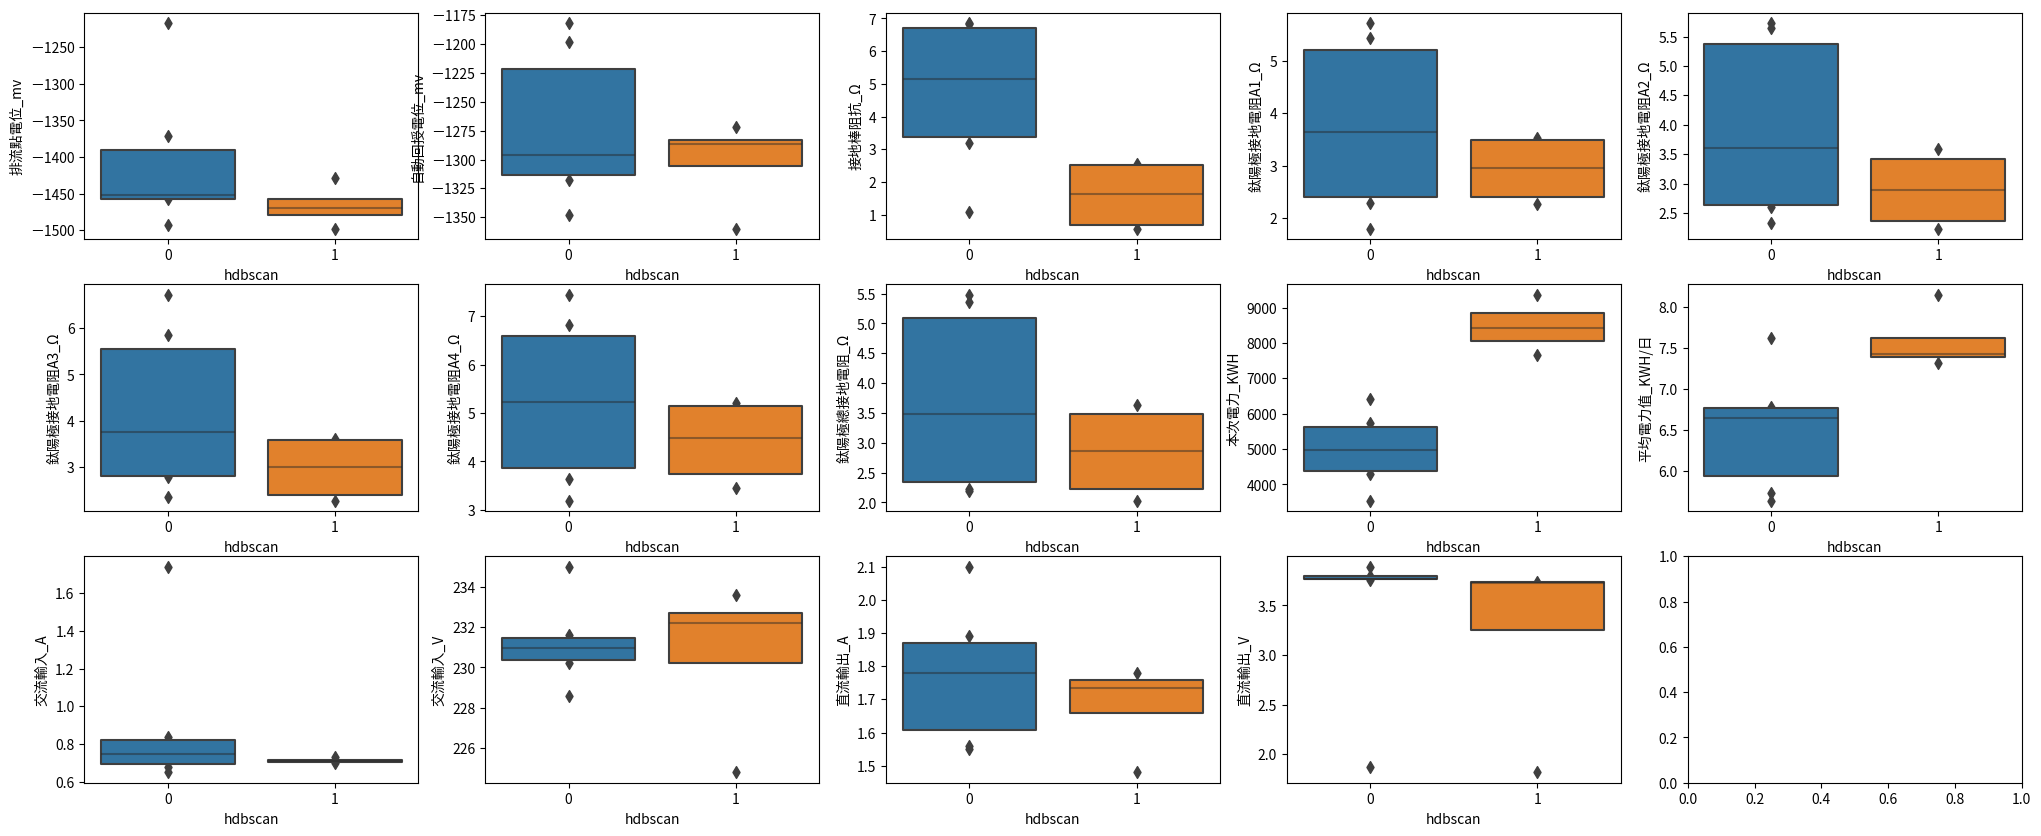

In [31]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_rectifier[k], x = "hdbscan", data = rectifier_24, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

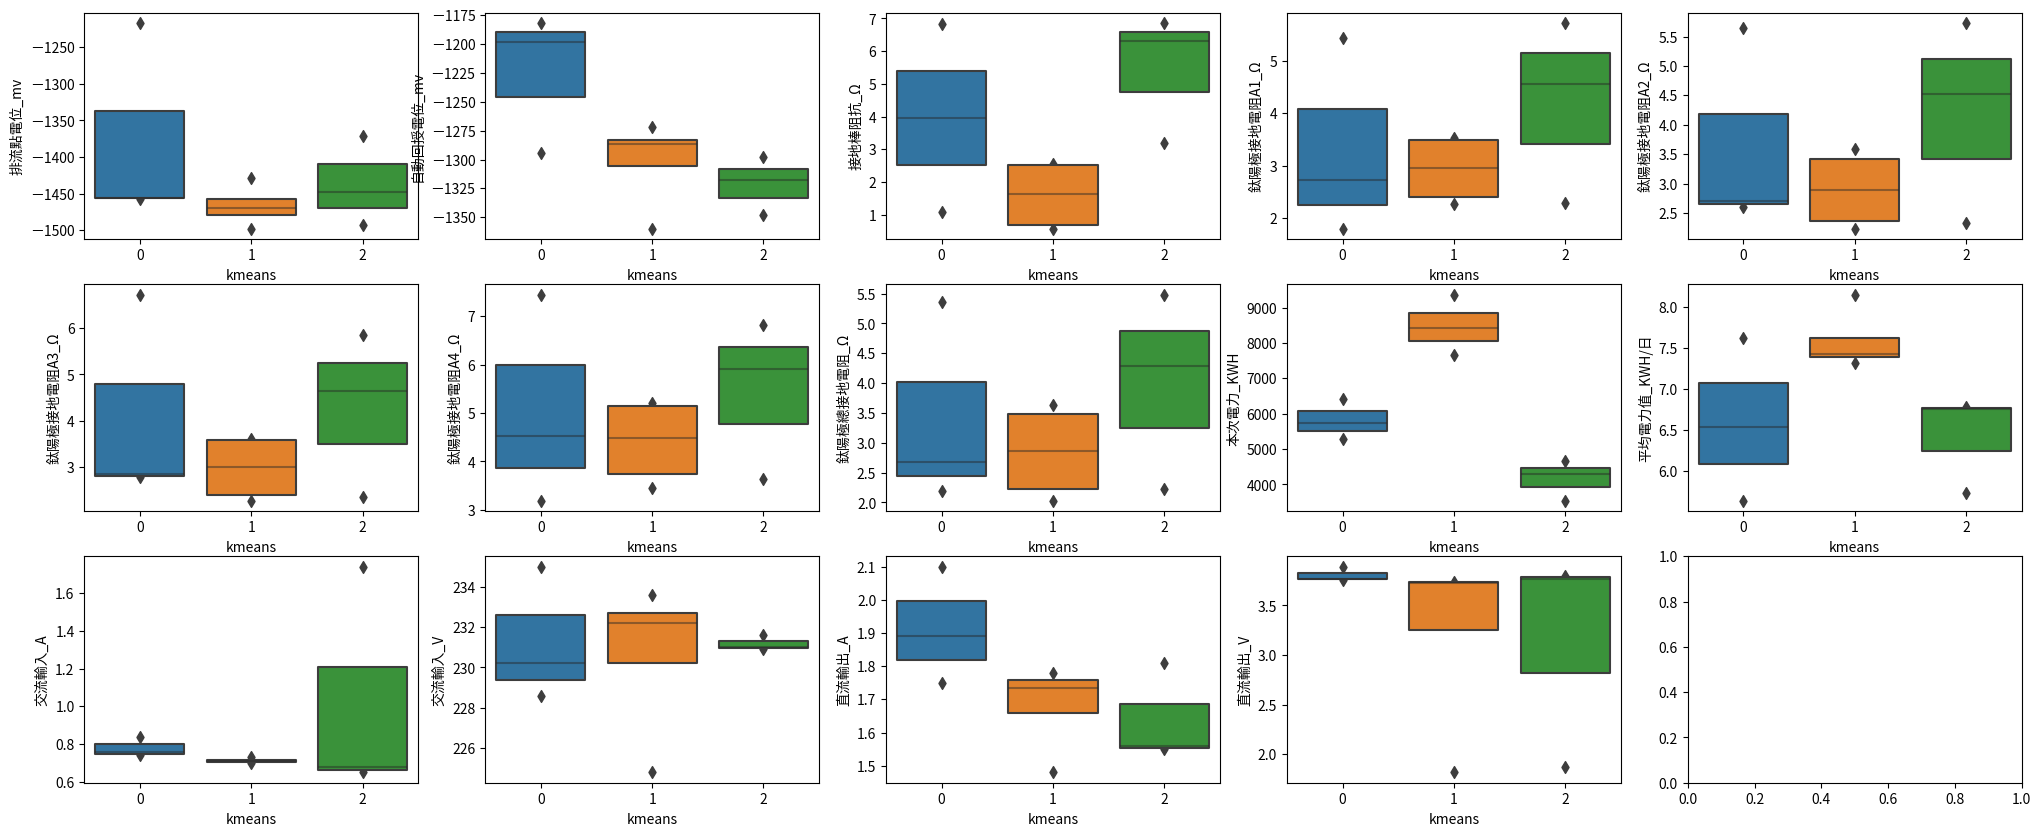

In [32]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_rectifier[k], x = "kmeans", data = rectifier_24, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

### rectifier_25

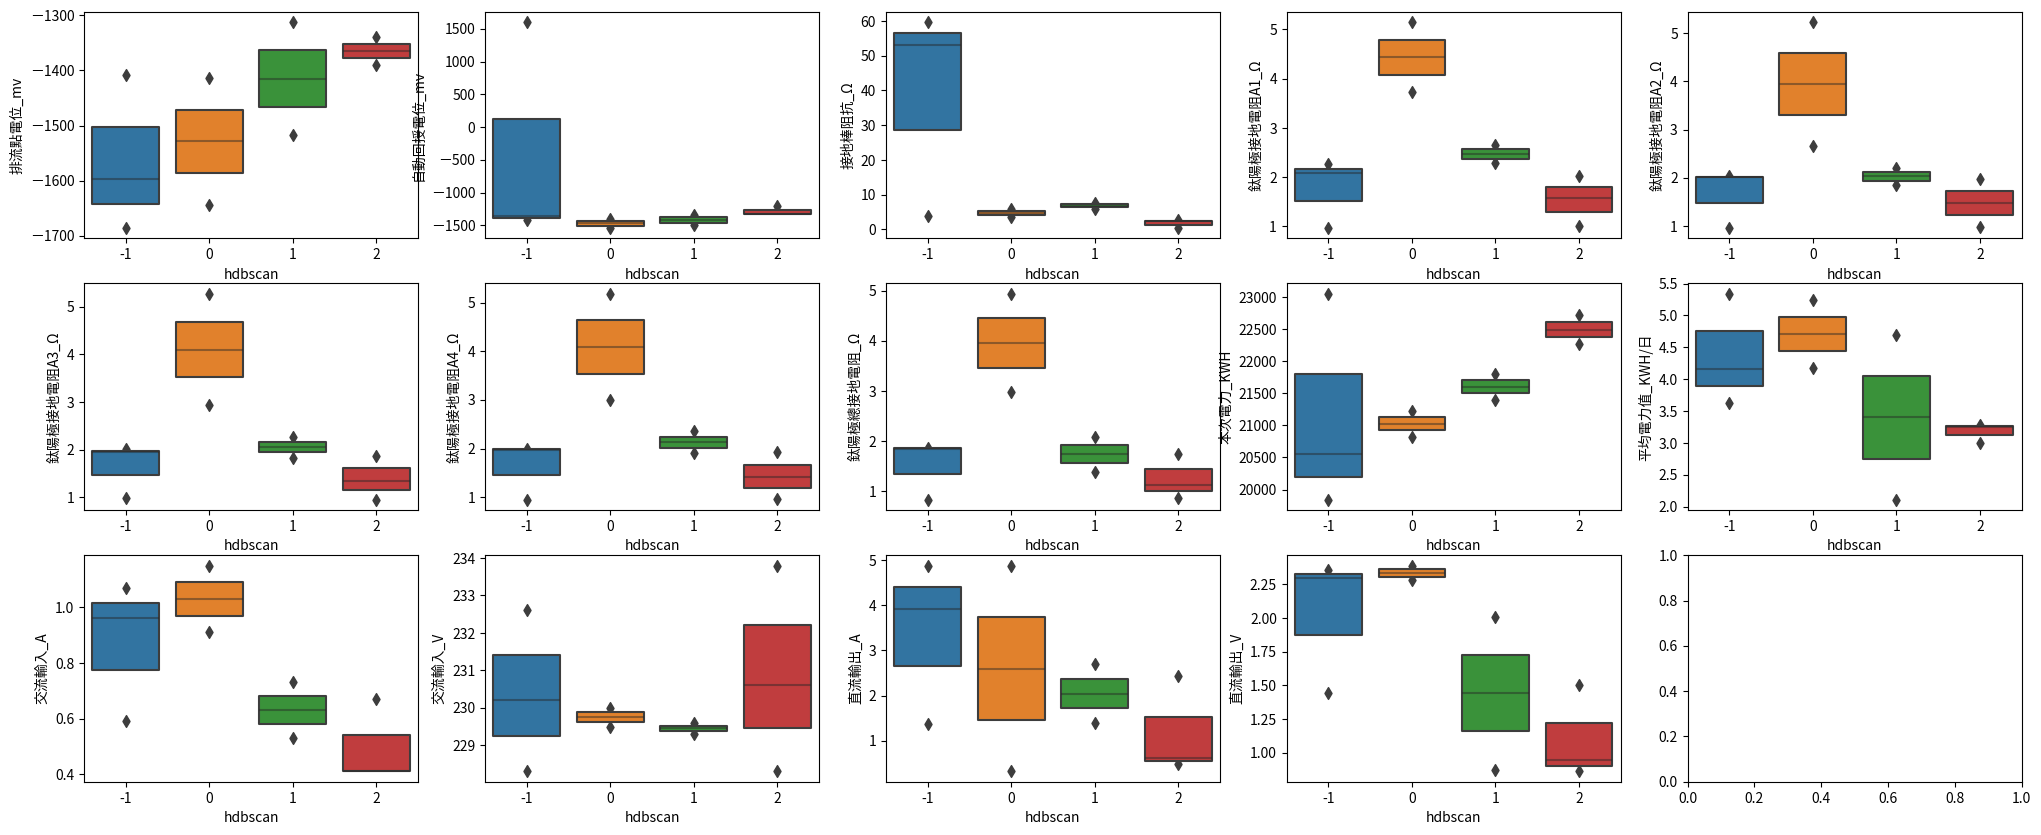

In [33]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_rectifier[k], x = "hdbscan", data = rectifier_25, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break

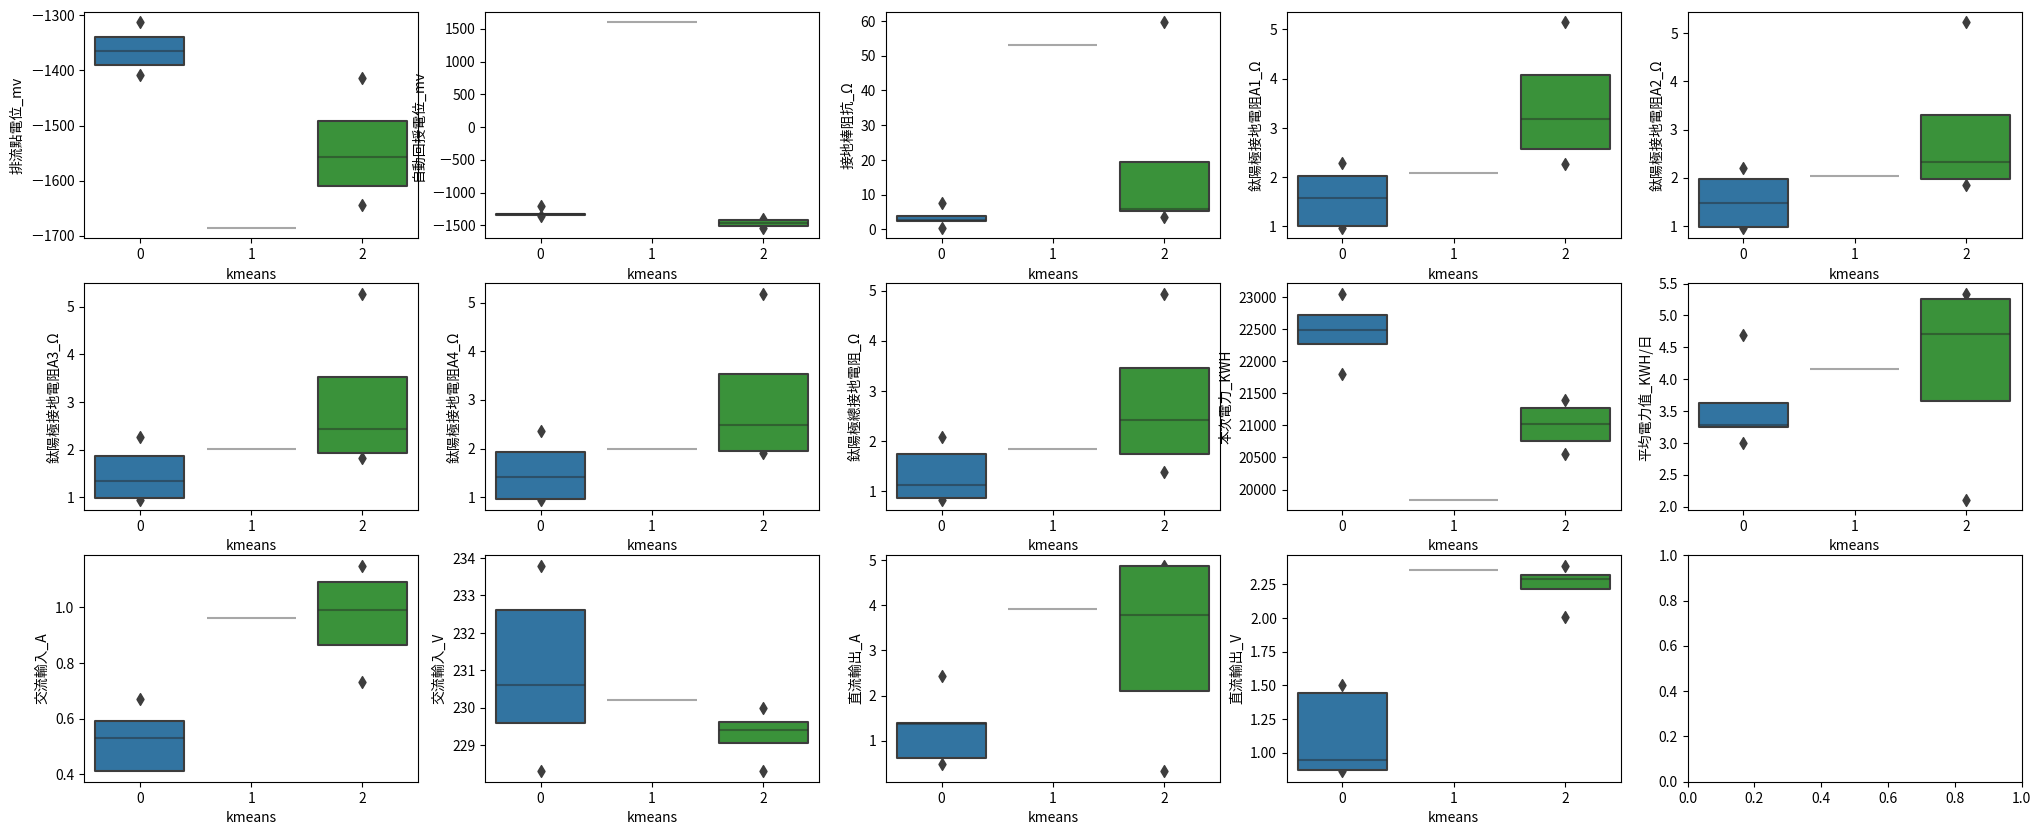

In [34]:
a = 3 ; b = 5 ; k = 0
fig, ax = plt.subplots(a, b, figsize = (25, 10))
for i in range(a):
    for j in range(b):
        sns.boxenplot(y = num_feat_rectifier[k], x = "kmeans", data = rectifier_25, ax = ax[i, j])
        k += 1

        if k == len(num_feat_rectifier):
            break